### Daniele Pelizan

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# to filter a specific warning
warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

### Read the dataset

In [2]:
booking = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another variable to avoid any changes to original data
df = booking.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [4]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

In [5]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

<IPython.core.display.Javascript object>

* The target variable booking_status is a categorical with two classes: Not_Canceled and Canceled. We need to replace this classe wiht 0 and 1 respectively (since we want to predict which booking is likely to be canceled this the class that will be equal to 1).
* We are going to check if Booking ID is the unique identifier of each booking. If so, we are going to drop it from our data set.

### Understand the shape of the data

In [6]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns.")

The data has 36275 rows and 19 columns.


<IPython.core.display.Javascript object>

### Checking for duplicate values

In [7]:
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are not duplicate values in the data set

### Checking for missing values

In [8]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data.

### Checking the data types of the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

* Most of the columns are either **int64** or **float64** data-types.
* Six columns are **object** data-types: `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status`. We need to convert these into suitable data-type before we feed our data into the model.

### Lets convert the columns with an 'object' datatype into categorical variables

In [10]:
for feature in df.columns:  # Loop through all columns in the dataframe
    if df[feature].dtype == "object":
        df[feature] = pd.Categorical(df[feature])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

<IPython.core.display.Javascript object>

The columns  `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are **category** data-types now.

### Dropping Booking_ID

In [11]:
# Checking how many unique values we have in Booking_ID
df["Booking_ID"].nunique()

36275

<IPython.core.display.Javascript object>

In [12]:
## Booking ID is the unique identifier of each booking, so we are going to drop it from our data set
df = df.drop("Booking_ID", axis=1)

<IPython.core.display.Javascript object>

In [13]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

### Summary of the dataset

In [14]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

<IPython.core.display.Javascript object>

* The median number of adults is 2, with the maximum of 4.
* The median number of weekend nights booked is 1.
* The median number of week nights booked is  2.
* The customers in average booked their room 85 days prior to their arrival. 25% of the customers book their room in or less than 17 days prior to their arrival.
* The average price per room 103€. The minimum value is 0€ and we are going to investigate.
* repeated_guest and required_car_parking_space are cagetorical variables.
* Children is the minority of customers.
* The majority of the customers has no previous cancellations, no previous bookings and no special requests.

In [15]:
df.describe(include="category").T

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

<IPython.core.display.Javascript object>

In [16]:
cat_columns = df.select_dtypes(include="category").columns.tolist()
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts(dropna=False))
    print("*" * 50)

Unique values in type_of_meal_plan are :
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Unique values in booking_status are :
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

* The majority of the customers selected the meal plan 1, the breakfast.
* There are 7 types of rooms. Room type 1 is the most popular.
* There are 5 market segments, and most of the bookings were made online.
* About 30% of the customers canceled their booking.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate analysis

In [17]:
# For numerical variables we want to study the dispersion and central tendency
# For this purpose we are going to plot histograms and box plots
# We are going to create a function that generates the plots
# This function takes the numerical variable as the input


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    # Using the function fig, ax = plt.subplots() to create 2 subplots
    # The subplots will be on top of each other: nrows = 2
    # The subplots will share the x-axis: sharex = True
    # The first subplot, ax_box2, will have 25% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}
    # The second subplot, ax_hist2, will have 75% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Creating the boxplot in the first subplot ax_box2, with the mean value displayed as a triangle (showmeans=True)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="red")

    # Creating an histogram in the second subplot ax_hist2
    # with an specificied number of bins if it was given in the function
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="blue")

    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    # Add median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label="Median"
    )
    # Add a legend to the histogram and position it outside the plot
    ax_hist2.legend(bbox_to_anchor=(1, 1))

<IPython.core.display.Javascript object>

### no_of_adults

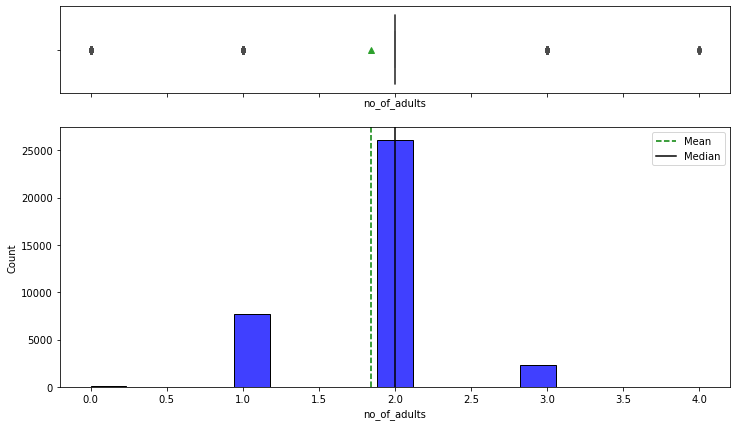

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "no_of_adults")

* In the distribution of no_of_adults we can see that the majority of the bookings is for two adults.
* There are some bookings with zero adults that we are going to ivestigate.
* This is a discrete variable.
* The distribution of no_of_adults suggest that we should look at it as a category to extract more information.

### no_of_children

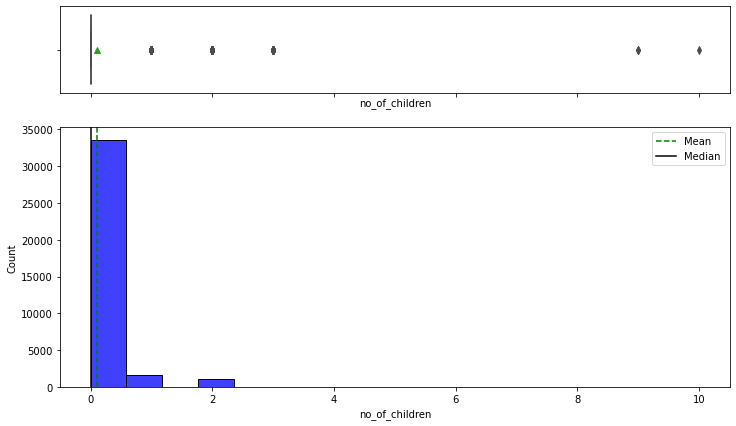

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "no_of_children")

* In the distribution of no_of_children we can see that the majority of the bookings is not for children.
* There are some amount of bookings for one and two children.
* This is a discrete variable.
* The distribution of no_of_children suggest that we should look at it as a category to extract more information.

### no_of_weekend_nights

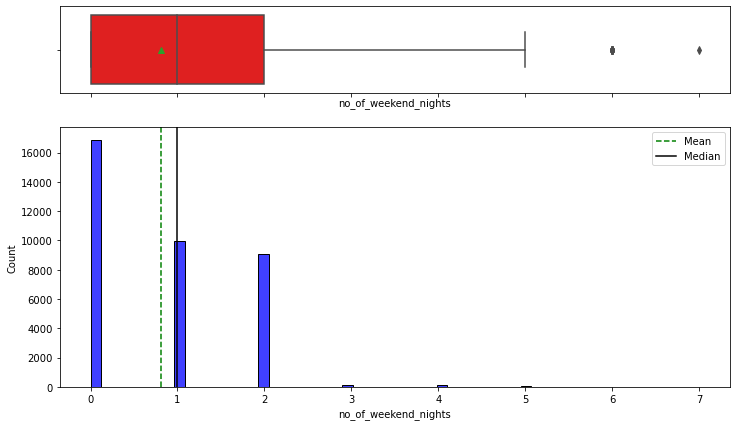

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "no_of_weekend_nights")

* The distribution of no_of_weekend_nights shows that a great number of customers don't book a room during the weekend.
* The distribution of no_of_weekend_nights suggest that we should look at it as a category to extract more information.

### no_of_week_nights

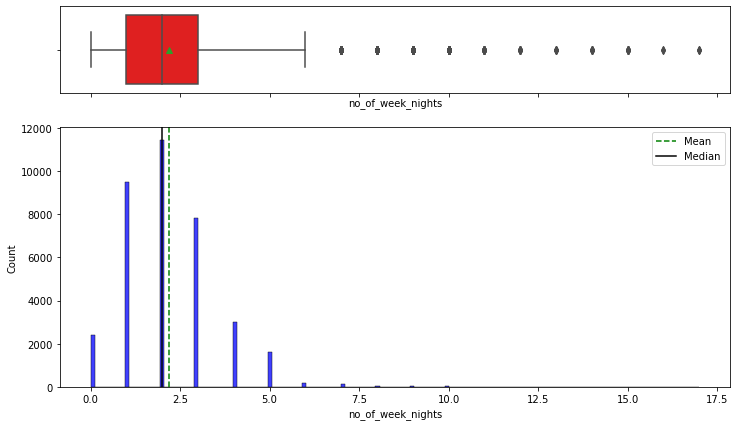

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "no_of_week_nights")

* The distribution of no_of_week_nights shows that a great number of customers book a room during the week.
* The distribution of no_of_week_nights suggest that we should look at it as a category to extract more information.

### lead_time

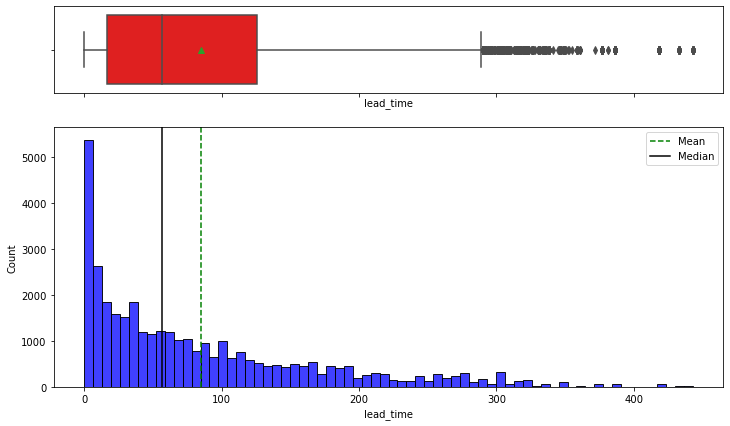

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "lead_time")

* The distribution of lead_time is right skewed.
* The customers book a room in average 85 days prior to the arrival date.
* A great number of custormers book their room in the day of arrival or a few days prior the arrival.

### no_of_previous_cancellations

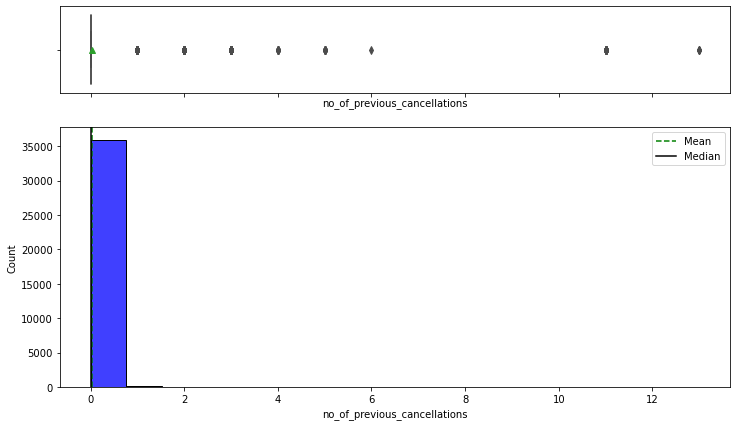

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "no_of_previous_cancellations")

* The majority of the customers don't have previous cancellations.
* The distribution of no_of_previous_cancellations suggest that we should look at it as a category to extract more information.

### no_of_previous_bookings_not_canceled

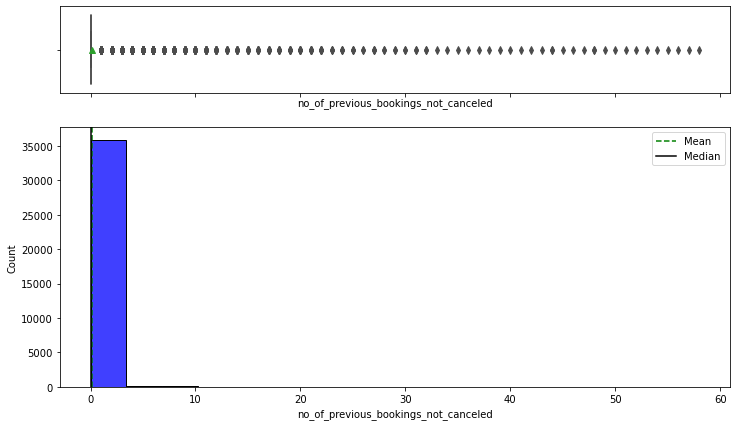

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

* The majority of the customers don't have previous bookings not canceled.
* The distribution of no_of_previous_bookings_not_canceled suggest that we should look at it as a category to extract more information.

### avg_price_per_room

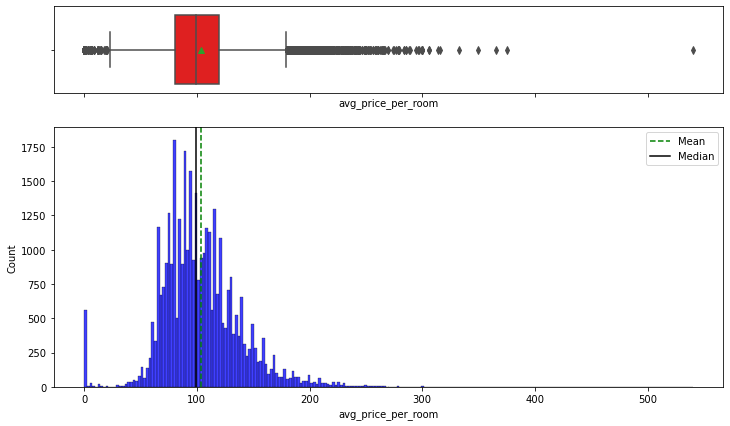

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "avg_price_per_room")

* The distribution of the average price per room is right skewed with a lot of outliers.
* The average price per room is around 100€.
* A few customers paid 500€ per room.
* There are a significant amount of customers that didn't need to pay for a room, and we are going to investigate this.

In [26]:
# filtering the avg_price_per_room with market_segment_type
df[df["avg_price_per_room"] == 0].market_segment_type.value_counts()

Complementary    354
Online           191
Aviation           0
Corporate          0
Offline            0
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

* The Complimentary Segment represents 65% of the customers that didn't pay for a room.
* The Online Segment represents the other 35% of the customers that didn't pay for a room.
* This could be part of a hotel's promotion.

### no_of_special_requests

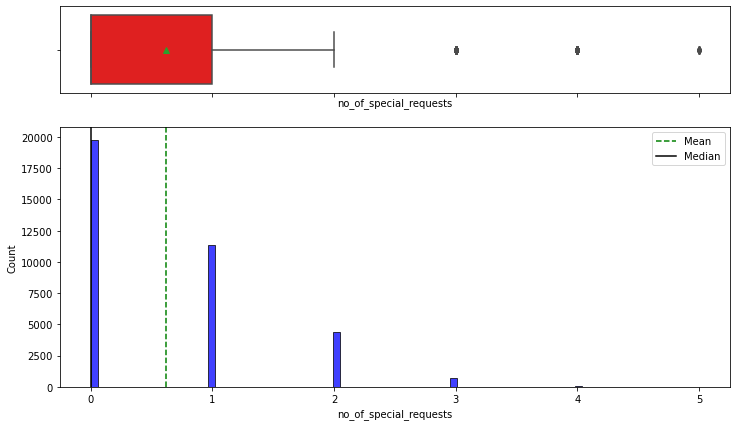

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "no_of_special_requests")

* The majority of the customers don't have special requests.
* The distribution of no_of_special_requests suggest that we should look at it as a category to extract more information.

In [1]:
# For categorical variables we want to study the number of observations in each category
# For this purpose we are going to plot a bar graph using the countplot function
# We are going to create a function that generates the plots
# This function takes the categorical variable as the input
# The bars will be labeled with the number of observations
# For the argument perc=True the bar will be labeled with the percentage of observations
# For the argument n= any integer number, the plot will have the n bars with the biggest number of obervations


def labeled_barplot(data, feature, perc=False, n=None):

    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column - number of rows in that column
    count = data[feature].nunique()  # nunique is number of unique values

    # Determining the figure size considering the number of bars
    if n is None:
        plt.figure(
            figsize=(count + 2, 7)
        )  # count+1 :the number of bars that we have + 1
    else:
        plt.figure(figsize=(n + 2, 7))  # n+1: number of bars that we want + 1

    plt.xticks(rotation=90, fontsize=15)  # Rotating the x axis labels

    # Creating the bar plot with a variable ax assigned to our plot. Then latter we can make manipulatios in this plot.
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    # Iterating over the bars one-by-one using the patches function to count the number of bars
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # calculating the percentage of each class of the category
        else:
            label = p.get_height()  # count of each class of the category

        # Get the x coordinate of the text by getting the width of the bar in which we are going to put our label
        x = p.get_x() + p.get_width() / 2

        # Get the y coordinate of the text by getting the height of the bar
        y = p.get_height()

        # Writing our label in the x,y coordinates over the bar,
        # and leave some space between the label and the boundary of the bar (xytext)
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()  # Show the plot

### no_of_adults

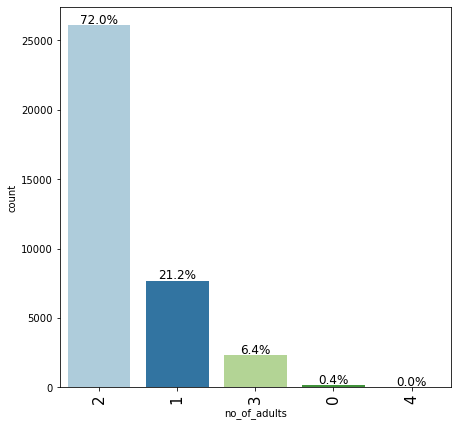

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "no_of_adults", perc=True)

* 72% of the bookings are for two adults followed by one adult with 21% of the bookings.
* 0.4% of the bookings don't have an adult. This could be the case where the parents booked two separate rooms, one for them and the other for the kids.

### no_of_children

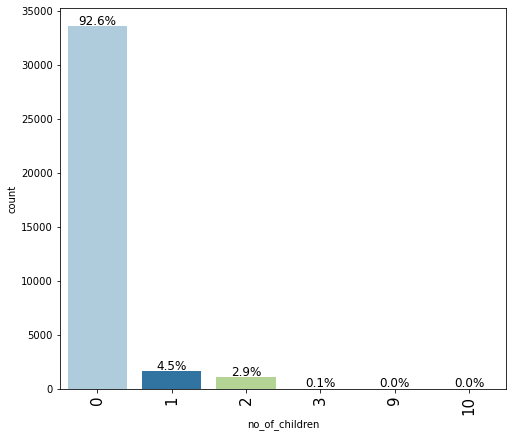

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "no_of_children", perc=True)

* 92% of the bookings don't include children.
* The bookings with children have one, two or three children.
* The bookings are for one room only and don't make sense to have 9 or 10 children in the same room. We are going to replace this high number of children with 3 children. 

In [31]:
df["no_of_children"][(df["no_of_children"] == 9) | (df["no_of_children"] == 10)] = 3

<IPython.core.display.Javascript object>

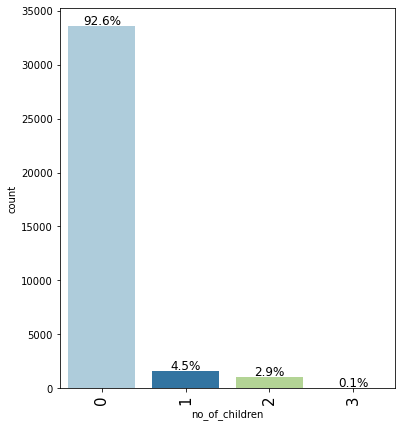

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "no_of_children", perc=True)

### no_of_weekend_nights

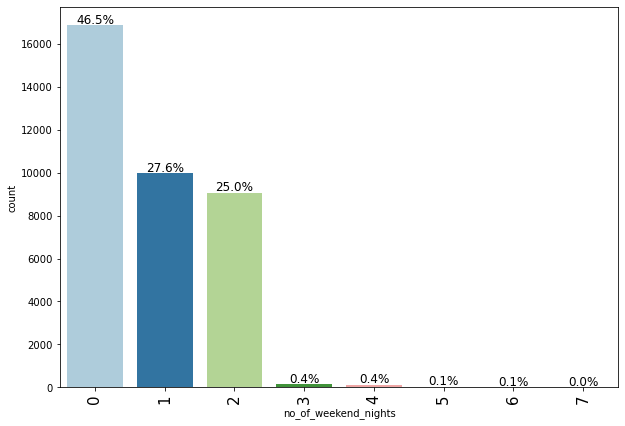

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

* 46% of the customers don't book the hotel for the weekend, followed by 27% that book one night of the weekend.

### no_of_week_nights

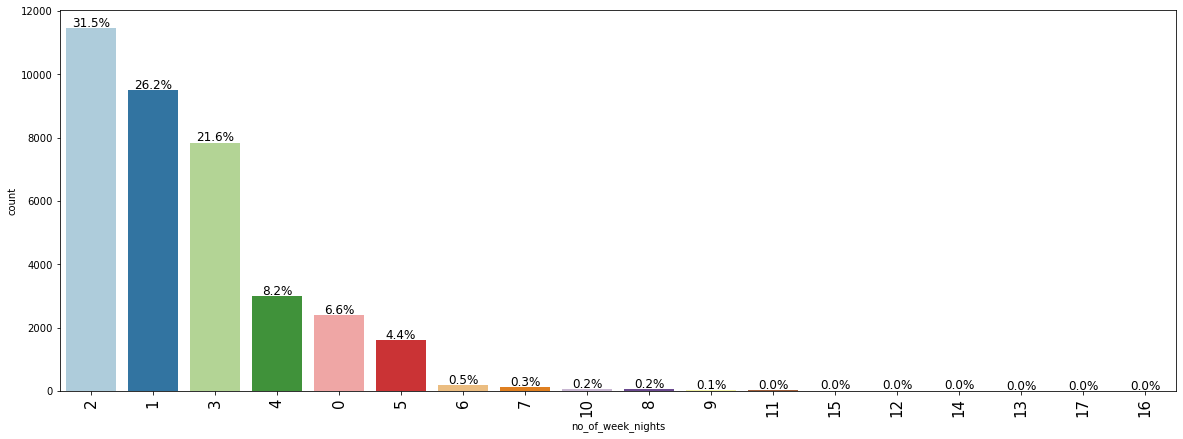

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "no_of_week_nights", perc=True)

* 31% of the customers book 2 week nights, followed by 26% that book one week night.

### type_of_meal_plan

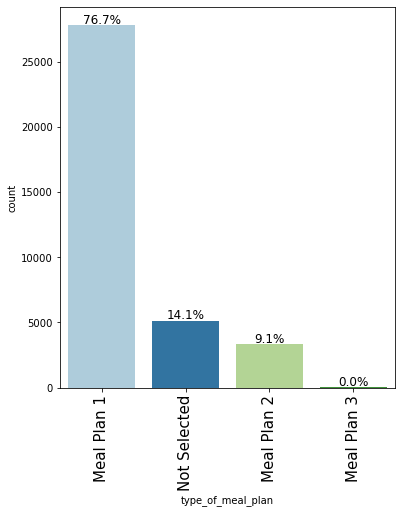

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

* 76% of the customers book a room with breakfast, followed by 14% that don't select a meal.

### required_car_parking_space

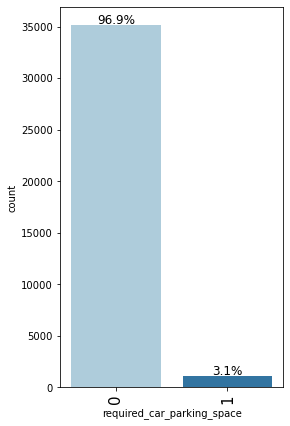

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "required_car_parking_space", perc=True)

* 97% of the customers don't require a parking space

### room_type_reserved

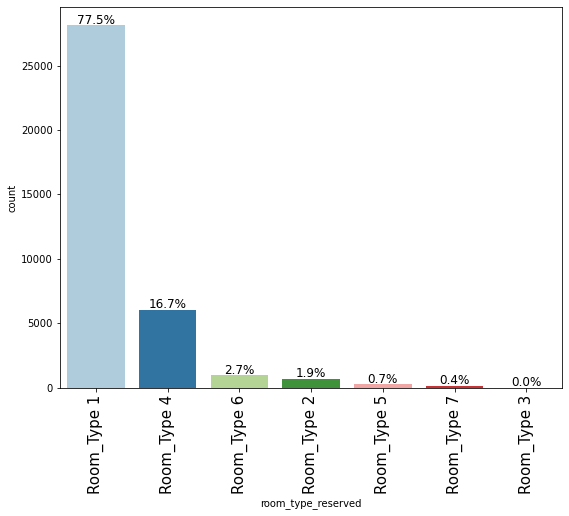

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "room_type_reserved", perc=True)

* 77% of the customers reserved the room type 1.
* These categories are encoded so it is difficult to comment on it.

### arrival_month
1. What are the busiest months in the hotel?

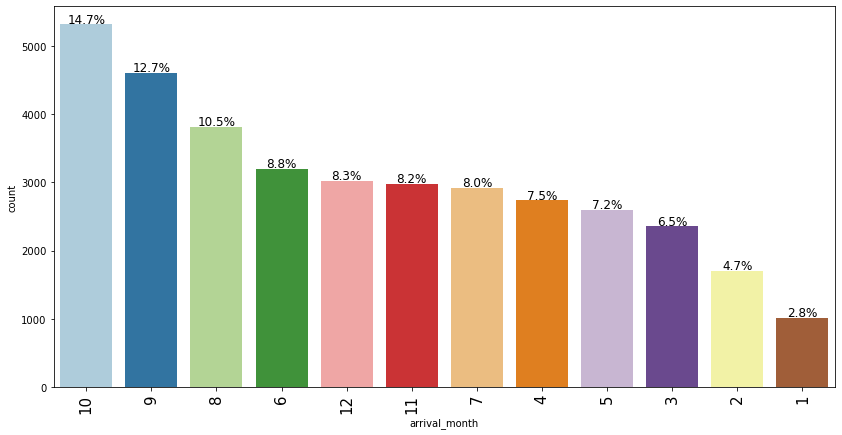

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "arrival_month", perc=True)

* 14% of the customers booked a room in October, followed by 12% that booked a room in September.
* October, September and August are the busiest months in the hotel.

### market_segment_type
2. Which market segment do most of the guests come from?

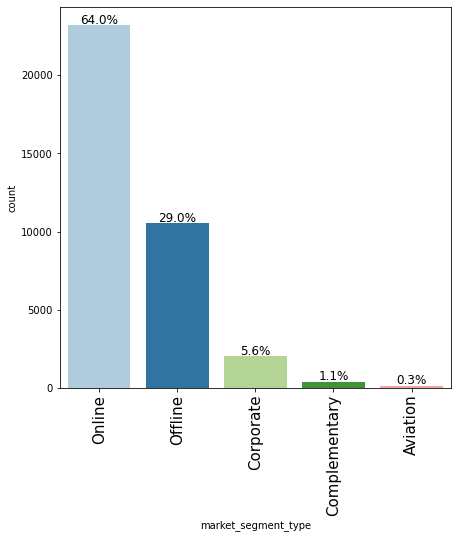

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df, "market_segment_type", perc=True)

* 64% of the customers booked a room online, followed by 29% that booked a room offline.
* Most of the guests come from the online market segment.

### repeated_guest

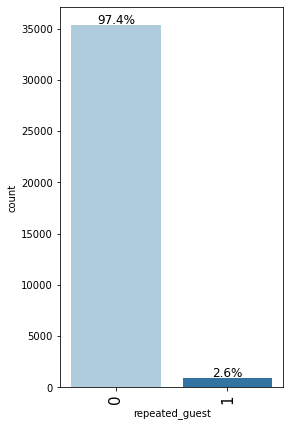

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df, "repeated_guest", perc=True)

* Only 2.6% of the customers are repeated guests.

### no_of_previous_cancelations

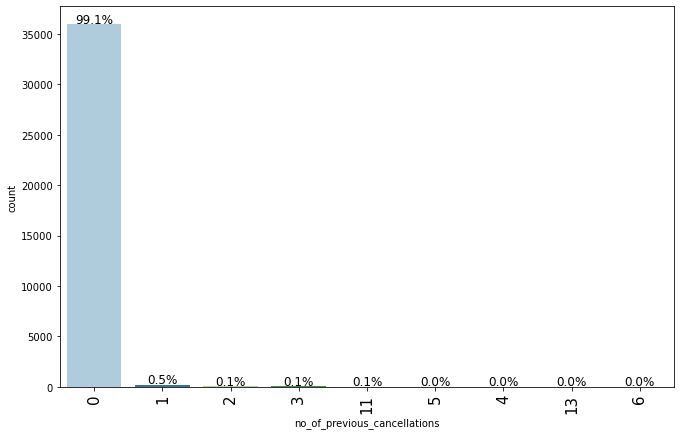

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(df, "no_of_previous_cancellations", perc=True)

* 99% of the customers don't have previous cancelations.
* 0.5% of the customers have one previous cancelation and 0.1% have 2 previous cancelations.

### no_of_previous_bookings_not_canceled

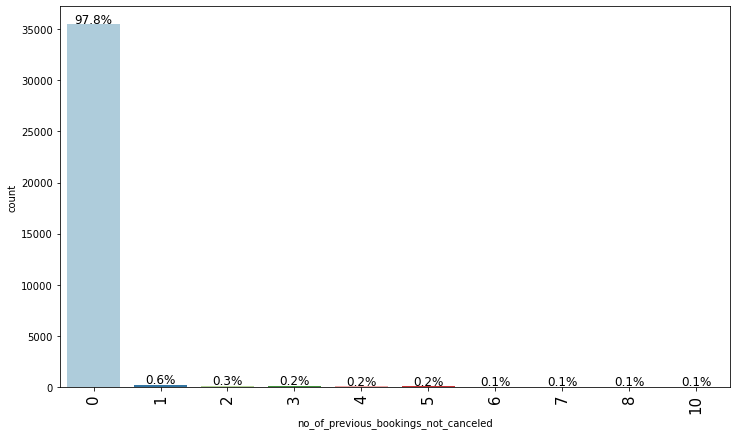

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(df, "no_of_previous_bookings_not_canceled", perc=True, n=10)

* 97.8% of the customers don't have previous bookings not canceled.

### no_of_special_requests

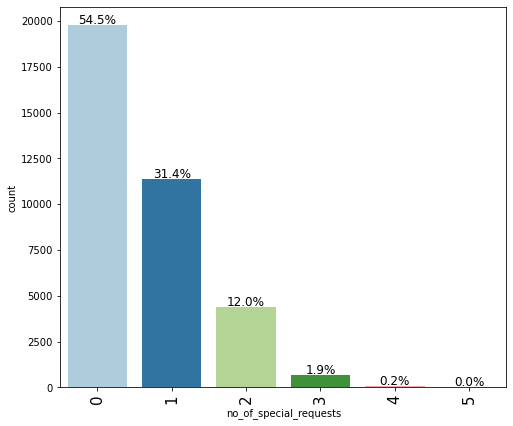

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "no_of_special_requests", perc=True)

* 54% of the customers don't have special requests, followed by 31% with one special request.

### booking_status
4. What percentage of bookings are canceled?

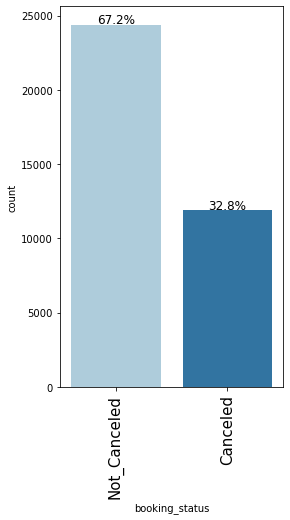

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(df, "booking_status", perc=True)

* 67.2% of the customers did not canceled their booking and 32.8% of the custormers canceled.

#### booking_status is our target variable, and we are going to encode Not_Canceled as 0 and Canceled as 1, as we want to predict which booking is likely to be canceled.
We are doing the encoding now to be able to see this variable in the correlation map as in other analysis.

In [45]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

### Bivariate analysis

Let's check the correlation between the numerical variables.

corr < -0.7 or corr > 0.7 indicates highly correlated attributes (strong linear dependence)

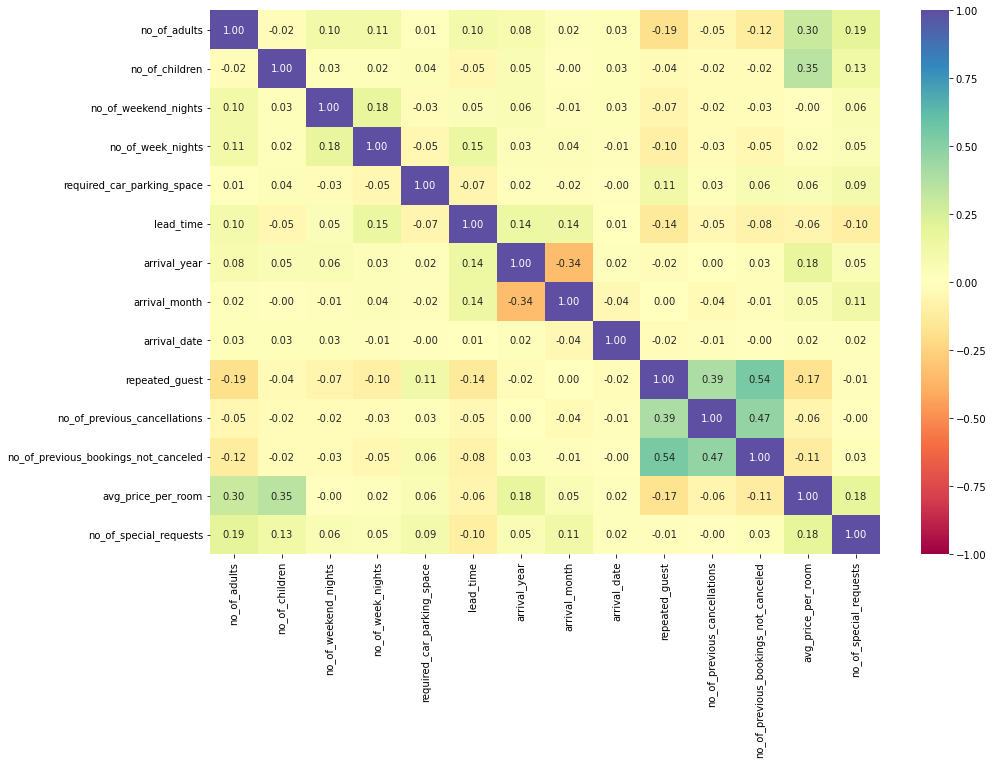

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* None of the variables are highly correlated.
* Number of children and number of adults have some correlation with the average price per room, as the number of guests increase, the average price per room increase.
* Lead time has a moderate correlation wiht booking status. The bigger the lead time more chances of the booking being canceled.
* Repeated guest has a moderate correlation with the number of previous cancelations and number of previous bookings not canceled, as someone needs to be a repeated guest to have a previous booking.
* Number of previous cancelations and number of previous bookings not canceled have a moderate correlation as some categories of this variables will share the same data (some customers has zero previous cancelation and some bookings not canceled as well).


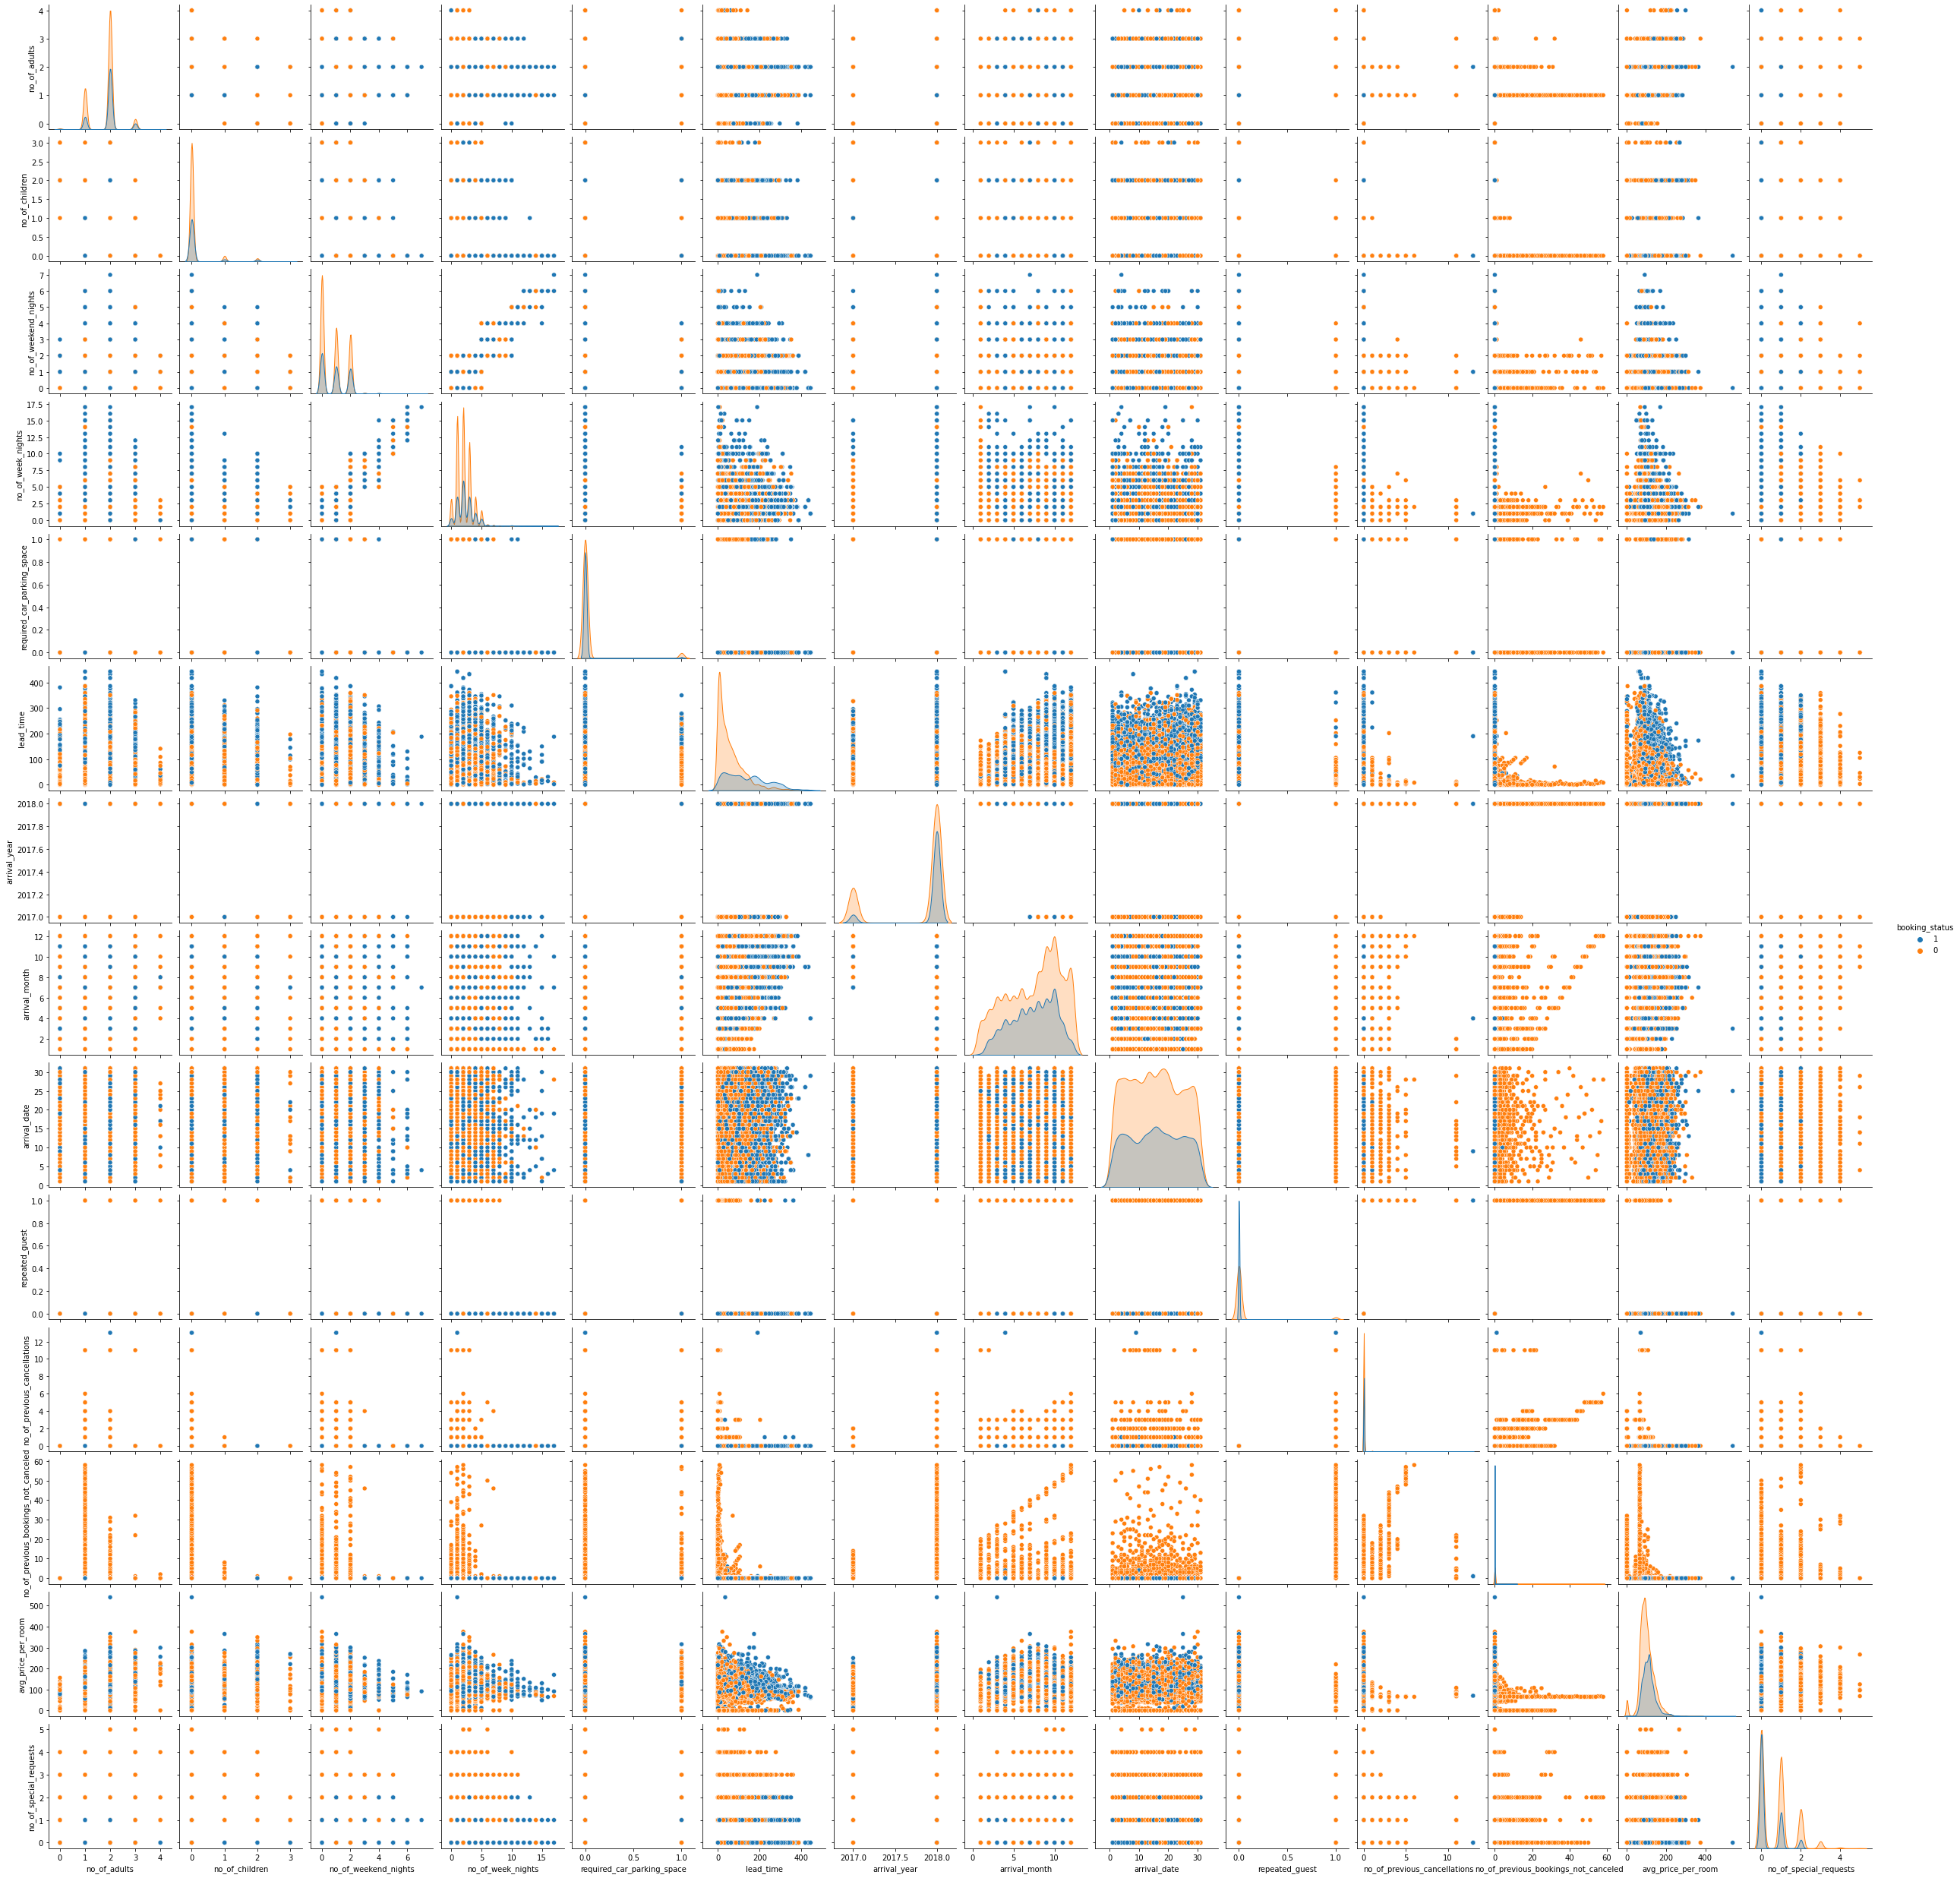

<IPython.core.display.Javascript object>

In [47]:
sns.pairplot(data=df, hue="booking_status")
plt.show()


* The distribution plots on diagonals for Class 0 and 1 seems to overlap a little.

Let's create functions that will help us plot two features

In [48]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### booking status vs lead_time

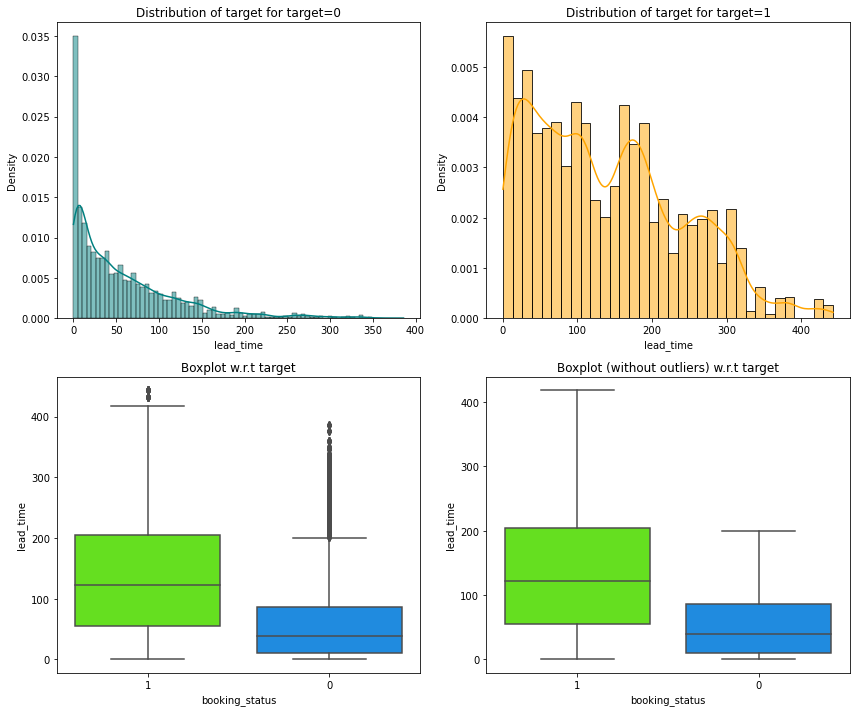

<IPython.core.display.Javascript object>

In [49]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

* 50% of the customres that cancel their booking have booked the room less than 120 days in advance.
* 50% of the customers that not cancel their booking make a booking less than 50 days before their arrival date.
* The customers that not cancel their booking almost don't have bookings more that 200 days in advance.
* The bookings canceled have a bigger lead time than the bookings not canceled.
* The higher the lead time, the greater the chance that the booking will be canceled.

### booking status vs avg_price_per_room

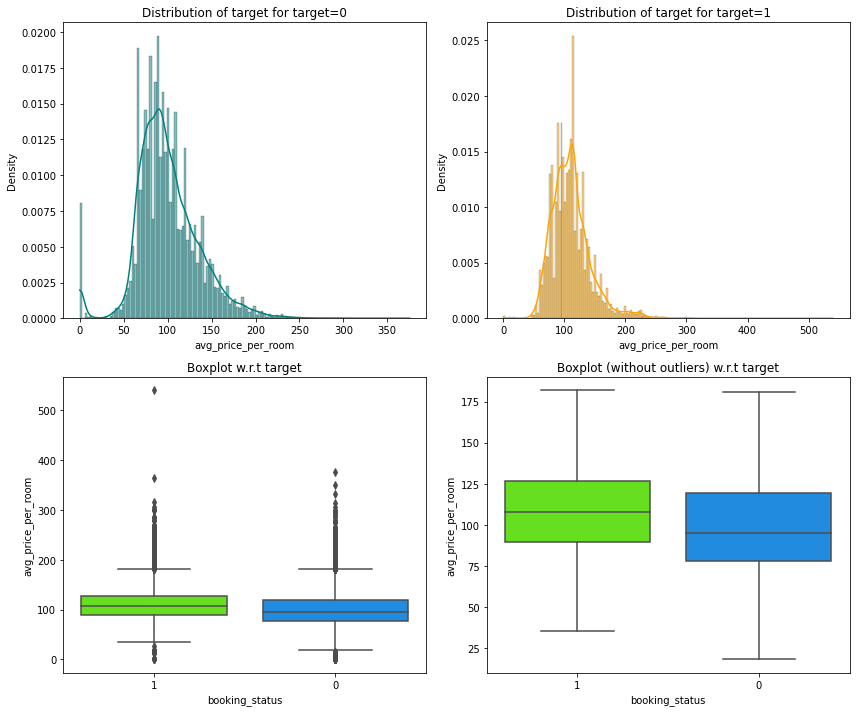

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

* There are almost no cancelation for the complimentary bookings.
* The average price per room is arount 90€ for the not canceled booking and around 110€ for the canceled booking.
* Ther rooms canceled are in average more expensive than the rooms not canceled.

In [51]:
# Creating a defined function boxplot


def boxplotgraph(data, feature_x, feature_y):

    """
    Boxplot

    data: dataframe
    feature_x: categorical feature
    feature_y: continuous feature
    """

    plt.figure(figsize=(10, 7))

    sns.boxplot(
        data=data,
        x=feature_x,
        y=feature_y,
        order=data.groupby(feature_x)[feature_y]
        .median()
        .sort_values(ascending=False)
        .index,
        showmeans=True,
        showfliers=False,
    )

    plt.show()

<IPython.core.display.Javascript object>

### avg_price_per_room vs market_segment_type

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

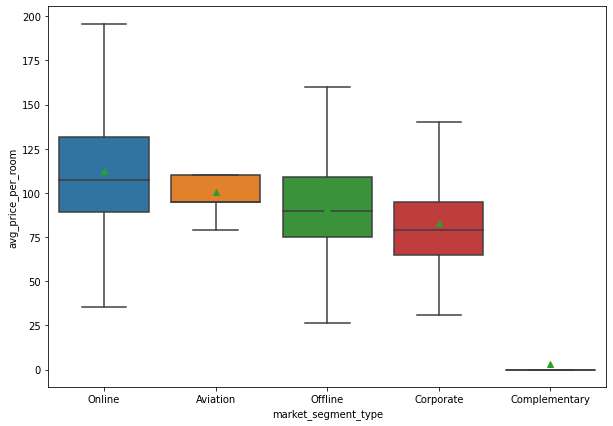

<IPython.core.display.Javascript object>

In [52]:
boxplotgraph(df, "market_segment_type", "avg_price_per_room")

* The average room price is expensive for the Online segment, around 115€, followed by the Aviation segment, around 100€.
* The average room price is around 95€ for the Offline segment and around 80€ for the Corporate segment.
* The Online segment pays more in average for a room. 
* The Corporate segment pays less in average for a room.

### avg_price_per_room vs type_of_meal_plan

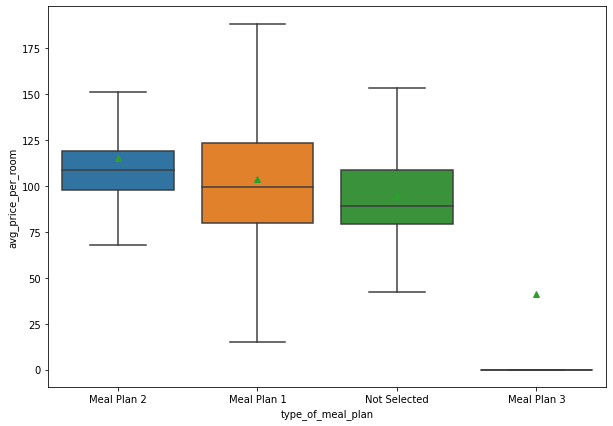

<IPython.core.display.Javascript object>

In [53]:
boxplotgraph(df, "type_of_meal_plan", "avg_price_per_room")

* Customers who choose Meal Plan 2 - breakfast and one other meal - pay more in average for a room than the customres who choose Meal Plan 1 - only breakfast.

### avg_price_per_room vs room_type_reserved

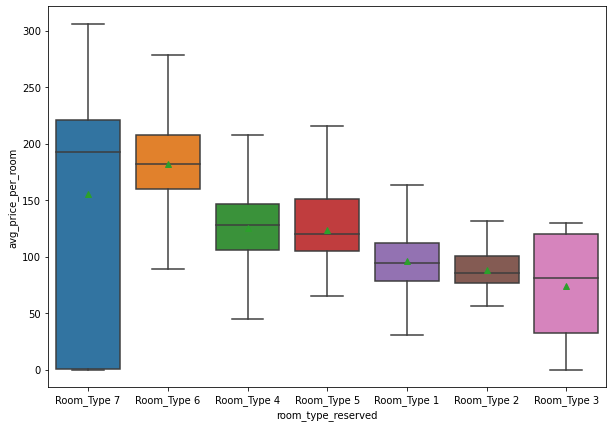

<IPython.core.display.Javascript object>

In [54]:
boxplotgraph(df, "room_type_reserved", "avg_price_per_room")

* Room Type 7 has a wide range of prices.
* Room Type 6 is the most expensive. 
* Room Type 3 is the cheapest in average.

### avg_price_per_room vs arrival month

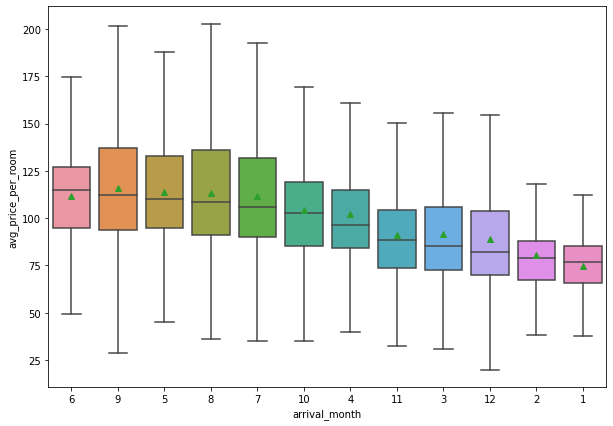

<IPython.core.display.Javascript object>

In [55]:
boxplotgraph(df, "arrival_month", "avg_price_per_room")

* May, June, July, August and September are the most expensive months to book a room in the hotel.

### avg_price_per_room vs no_of_special_requests

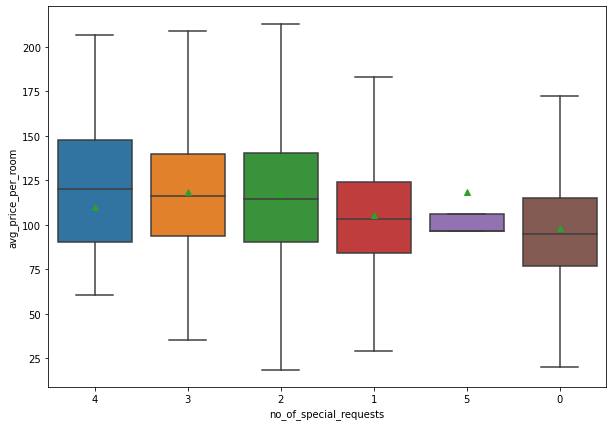

<IPython.core.display.Javascript object>

In [56]:
boxplotgraph(df, "no_of_special_requests", "avg_price_per_room")

* The more special requests the customer make, pricier is the hotel room. Requests like higher floor room, champagne and flowers in the room, room with preferred view, early arrival to name a few, will make the average price per room go up.
* Customers who don't make special requests pay less for the hotel room compared with that who make special requests.
* We don't have a big number of data for the customres who make 5 special requests.

In [57]:
# Let's create a defined function to plot a crosstab of two categorical variables


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### booking_status vs repeated_guest
5.Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status      1      0    All
repeated_guest                     
All             11885  24390  36275
0               11869  23476  35345
1                  16    914    930
------------------------------------------------------------------------------------------------------------------------


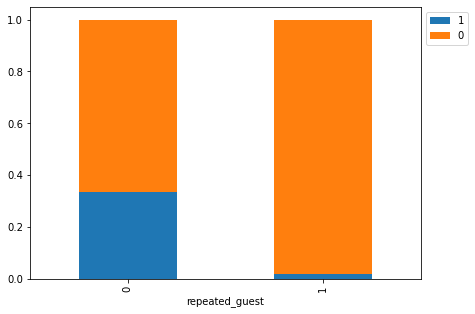

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(df, "repeated_guest", "booking_status")

In [59]:
print(f"Around {round(16/930 *100,2)}% of the repeating guests canceled their booking.")
print(f"Around {round(11869/35345 *100,2)}% of the new guests canceled their booking.")

Around 1.72% of the repeating guests canceled their booking.
Around 33.58% of the new guests canceled their booking.


<IPython.core.display.Javascript object>

###  booking_status vs no_of_special_requests
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status              1      0    All
no_of_special_requests                     
All                     11885  24390  36275
0                        8545  11232  19777
1                        2703   8670  11373
2                         637   3727   4364
3                           0    675    675
4                           0     78     78
5                           0      8      8
------------------------------------------------------------------------------------------------------------------------


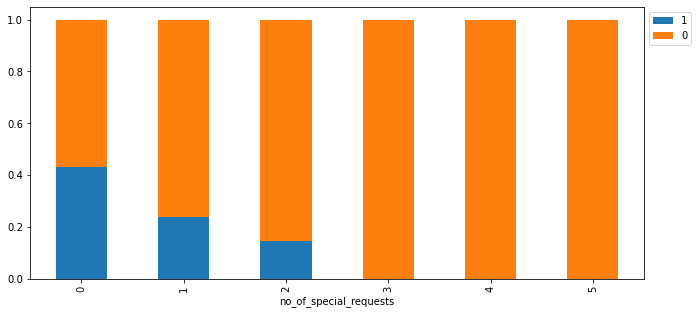

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

* The more special requests a guest have, less likely he is going to cancel.
* Guests with 3 or more special requests don't cancel their booking.
* 43%  of the guests with no special request cancel their booking.
* 25%  of the guests with one special request cancel their booking.
* 18%  of the guests with two special requests cancel their booking.

###  booking_status vs no_of_adults

booking_status      1      0    All
no_of_adults                       
All             11885  24390  36275
2                9119  16989  26108
1                1856   5839   7695
3                 863   1454   2317
0                  44     95    139
4                   3     13     16
------------------------------------------------------------------------------------------------------------------------


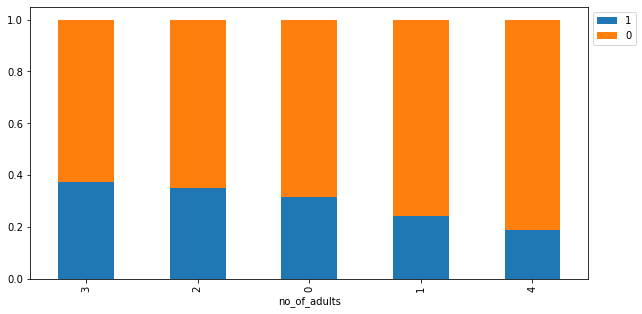

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(df, "no_of_adults", "booking_status")

* Around 36% of the cutomers cancel their booking if they are booking for 2 or 3 adults.
* We have some bookings with no adults, but this is probably a second room booked by the parents for their children, or some school trip. With no adults the cancelation is around 30%.
* Around 25% of the cutomers cancel their booking if they are booking for 1 adult.
* Around 20% of the cutomers cancel their booking if they are booking for 4 adults.
* Let's investigate further how many of this adults are traveling without kids and how this impact the cancelation rates.

###  booking_status vs no_of_adults traveling without children
Let's check how the booking status is affected when the booking is for adults without children.

booking_status      1      0    All
no_of_adults                       
All             10882  22695  33577
2                8213  15506  23719
1                1809   5742   7551
3                 857   1434   2291
4                   3     13     16
------------------------------------------------------------------------------------------------------------------------


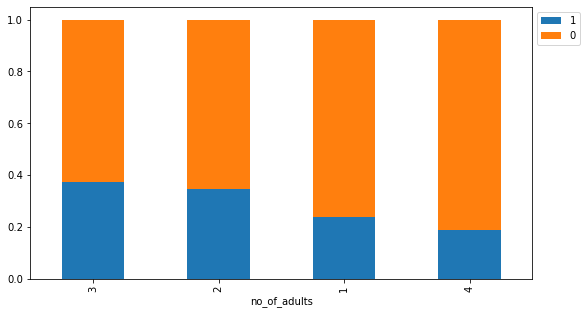

<IPython.core.display.Javascript object>

In [62]:
df_only_adult = df[(df["no_of_adults"] >= 1) & (df["no_of_children"] == 0)]


stacked_barplot(df_only_adult, "no_of_adults", "booking_status")

* The cancelation rate is smaller, around 20%, when the guests are four adults. But we have a small number of bookings in this category.
* The cancelation is around 23% when the guest is one adult traveling without children, and it's one of the lowest cancelation rates. This is generaly the guest who travels for business.
* The cancelation rate is around 37% when we have two or three adults traveling without kids. This can be a vacation trip and it's difficult to keep the plans when we have two or three people involved.

###  booking_status vs no_of_adults + no_of_children
Let's check how the booking status is affected when the booking is for families. We consider a family when we have 2 adults or more traveling with or without children.

booking_status           1      0    All
no_of_family_members                    
All                   9985  18456  28441
2                     8213  15506  23719
3                     1368   2425   3793
4                      398    514    912
5                        6     11     17
------------------------------------------------------------------------------------------------------------------------


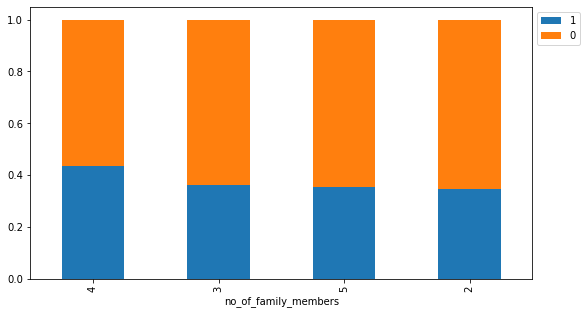

<IPython.core.display.Javascript object>

In [63]:
df_family = df[(df["no_of_adults"] > 1) & (df["no_of_children"] >= 0)]
df_family["no_of_family_members"] = (
    df_family["no_of_adults"] + df_family["no_of_children"]
)

stacked_barplot(df_family, "no_of_family_members", "booking_status")

 * The cancelation rate is around 35% when the guest is a family with two, three or five members.
 * The cancelation rate is around 45% when the guest is a family with four members.

###  booking_status vs no_of_weekend_nights

booking_status            1      0    All
no_of_weekend_nights                     
All                   11885  24390  36275
0                      5093  11779  16872
1                      3432   6563   9995
2                      3157   5914   9071
4                        83     46    129
3                        74     79    153
5                        29      5     34
6                        16      4     20
7                         1      0      1
------------------------------------------------------------------------------------------------------------------------


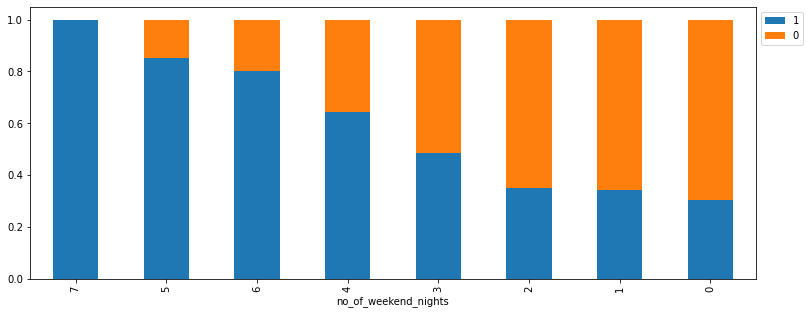

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(df, "no_of_weekend_nights", "booking_status")

* The lowest cancelation rate is about 30% for the customers who don't book a weekend night.
* The cancelation rate is about 35% for the customers who book one and two weekend nights.
* The cancelation rate grows as as the number of weekend nights in the booking grows.

###  booking_status vs no_of_week_nights

booking_status         1      0    All
no_of_week_nights                     
All                11885  24390  36275
2                   3997   7447  11444
3                   2574   5265   7839
1                   2572   6916   9488
4                   1143   1847   2990
0                    679   1708   2387
5                    632    982   1614
6                     88    101    189
10                    53      9     62
7                     52     61    113
8                     32     30     62
9                     21     13     34
11                    14      3     17
15                     8      2     10
12                     7      2      9
13                     5      0      5
14                     4      3      7
16                     2      0      2
17                     2      1      3
------------------------------------------------------------------------------------------------------------------------


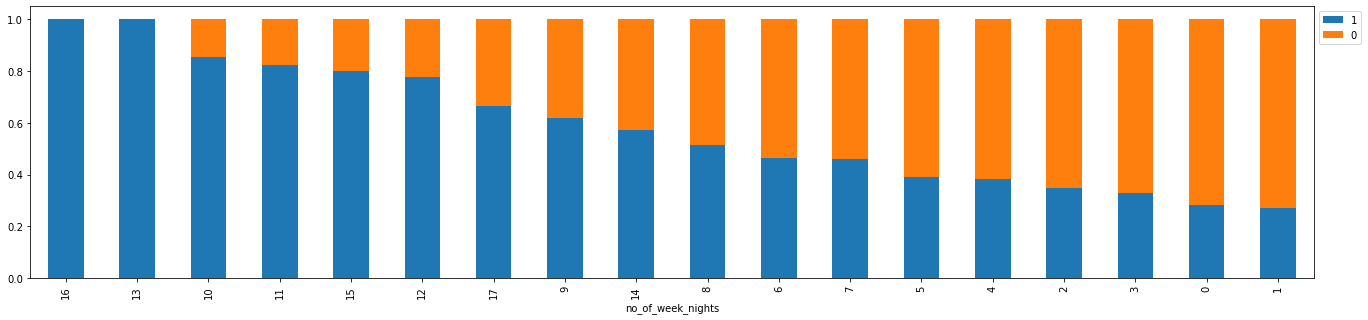

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(df, "no_of_week_nights", "booking_status")

* The lowest cancelation rate is about 27% for the customers who don't book a week night or book one week night.
* The cancelation rate grows as as the number of week nights in the booking grows.

###  booking_status vs no_of_weekend_nights + no_of_week_nights

booking_status      1      0    All
no_of_nights                       
All             11885  24390  36275
3                3586   6466  10052
2                2899   5573   8472
4                1941   3952   5893
1                1466   5138   6604
5                 823   1766   2589
6                 465    566   1031
7                 383    590    973
8                  79    100    179
10                 58     51    109
9                  53     58    111
14                 27      5     32
15                 26      5     31
13                 15      3     18
12                 15      9     24
11                 15     24     39
20                  8      3     11
16                  5      1      6
19                  5      1      6
17                  4      1      5
18                  3      0      3
21                  3      1      4
22                  2      0      2
0                   2     76     78
23                  1      1      2
24                  1      0

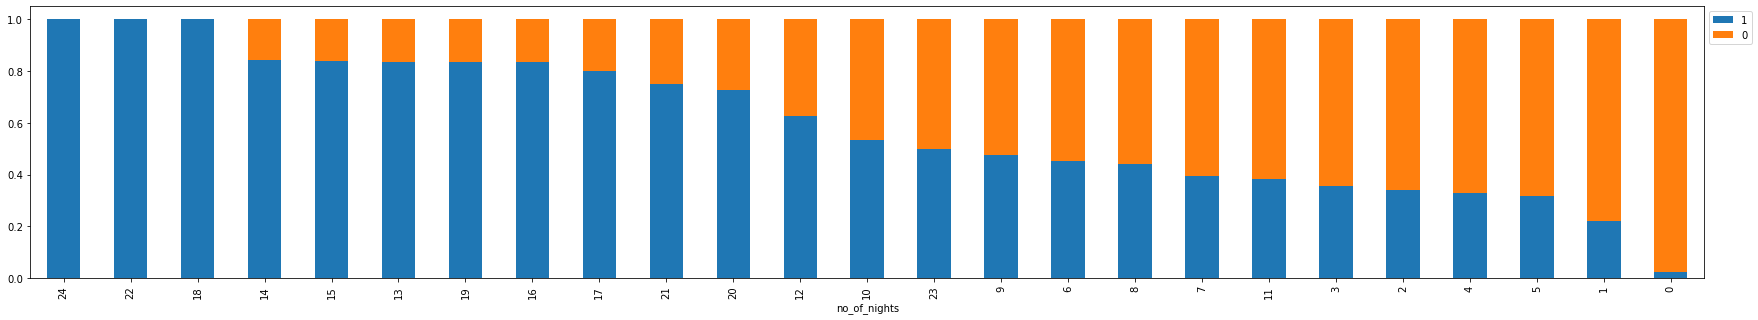

<IPython.core.display.Javascript object>

In [66]:
df_total_nights = df.copy()
df_total_nights["no_of_nights"] = df["no_of_weekend_nights"] + df["no_of_week_nights"]

stacked_barplot(df_total_nights, "no_of_nights", "booking_status")

* In general the cancelation rate grows as as the number of the nights in the booking grows.

###  booking_status vs type_of_meal_plan

booking_status         1      0    All
type_of_meal_plan                     
All                11885  24390  36275
Meal Plan 1         8679  19156  27835
Not Selected        1699   3431   5130
Meal Plan 2         1506   1799   3305
Meal Plan 3            1      4      5
------------------------------------------------------------------------------------------------------------------------


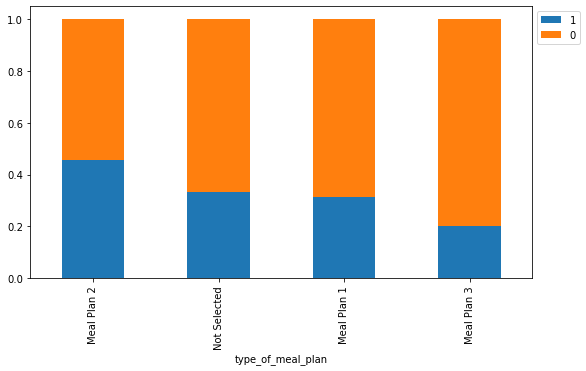

<IPython.core.display.Javascript object>

In [67]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

* The cancelation rate is 30% for the customers who don't select a meal and for the customers who select Meal Plan 1 - breakfast only.
* The cancelation rate is 45% for the customers who select Meal Plan 2 - breakfast and one other meal.
* We have very few data in the Meal Plan 3 to draw a conclusion.

###  booking_status vs required_car_parking_space

booking_status                  1      0    All
required_car_parking_space                     
All                         11885  24390  36275
0                           11771  23380  35151
1                             114   1010   1124
------------------------------------------------------------------------------------------------------------------------


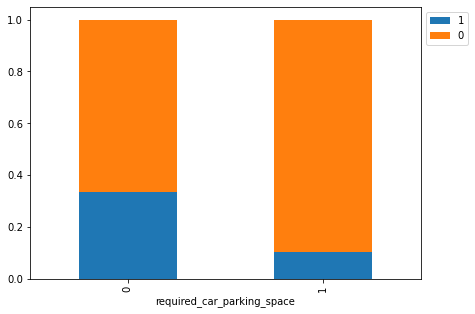

<IPython.core.display.Javascript object>

In [68]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

* The customers that require a parking space as less likely to cancel the booking (10% cancelation rate) than the customers who don't require a parking space.

###  booking_status vs room_type_reserved

booking_status          1      0    All
room_type_reserved                     
All                 11885  24390  36275
Room_Type 1          9072  19058  28130
Room_Type 4          2069   3988   6057
Room_Type 6           406    560    966
Room_Type 2           228    464    692
Room_Type 5            72    193    265
Room_Type 7            36    122    158
Room_Type 3             2      5      7
------------------------------------------------------------------------------------------------------------------------


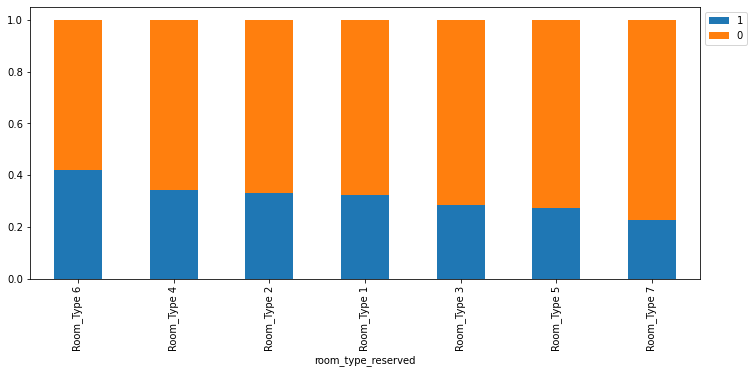

<IPython.core.display.Javascript object>

In [69]:
stacked_barplot(df, "room_type_reserved", "booking_status")

* Guests who reserved Room Type 7 are less likely to cancel the booking.
* Guests who reserved Room Type 6 are more likely to cancel the booking.

###  booking_status vs arrival_month

booking_status      1      0    All
arrival_month                      
All             11885  24390  36275
10               1880   3437   5317
9                1538   3073   4611
8                1488   2325   3813
7                1314   1606   2920
6                1291   1912   3203
4                 995   1741   2736
5                 948   1650   2598
11                875   2105   2980
3                 700   1658   2358
2                 430   1274   1704
12                402   2619   3021
1                  24    990   1014
------------------------------------------------------------------------------------------------------------------------


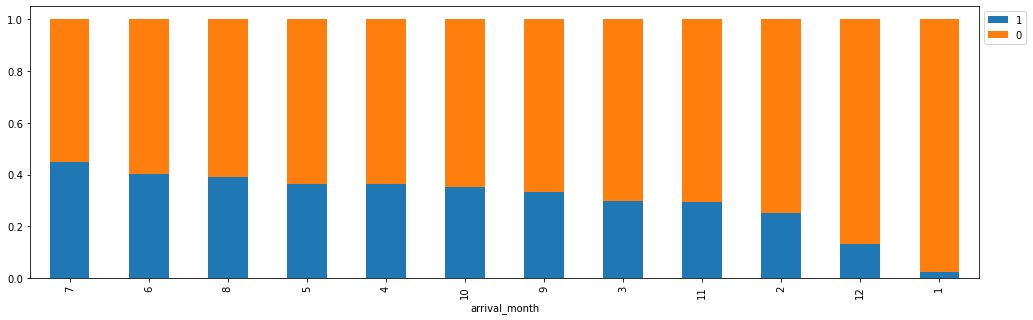

<IPython.core.display.Javascript object>

In [70]:
stacked_barplot(df, "arrival_month", "booking_status")

* The cancelation rate is very low in January, around 2%, followed by december with 10% of cancelations.
* Feburary has a cancelatio rate of 25%, and November and March have a cancelation rate of 30%.
* The Summer months have the highest cancelation rates, around 40%.
* The Winter months have the lowest cancelation rates.

###  booking_status vs market_segment_type

booking_status           1      0    All
market_segment_type                     
All                  11885  24390  36275
Online                8475  14739  23214
Offline               3153   7375  10528
Corporate              220   1797   2017
Aviation                37     88    125
Complementary            0    391    391
------------------------------------------------------------------------------------------------------------------------


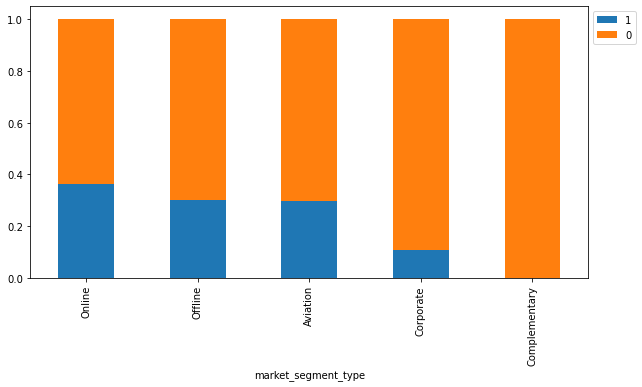

<IPython.core.display.Javascript object>

In [71]:
stacked_barplot(df, "market_segment_type", "booking_status")

* The Complimentary segment don't have any cancelations.
* The Corporate segment has the lowest cancelation rate, only 10%. These are guests who travel for business and are less likely to cancel their trip.
* The Aviation and Online segment has a cancelation rate of 30%.
* The Online segment has the highest cancelation rate, 35%.

###  booking_status vs  no_of_previous_cancelations

booking_status                    1      0    All
no_of_previous_cancellations                     
All                           11885  24390  36275
0                             11869  24068  35937
1                                11    187    198
13                                4      0      4
3                                 1     42     43
2                                 0     46     46
4                                 0     10     10
5                                 0     11     11
6                                 0      1      1
11                                0     25     25
------------------------------------------------------------------------------------------------------------------------


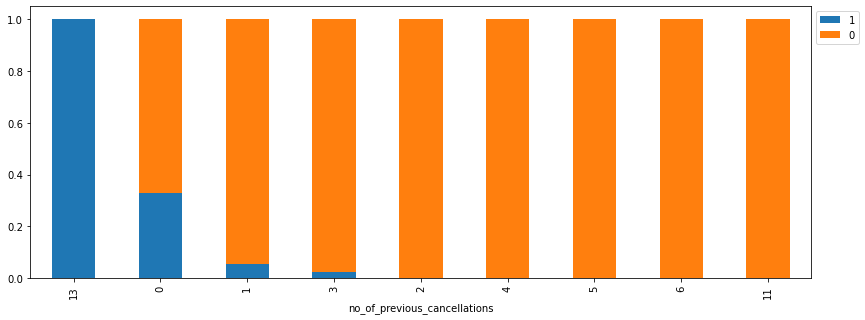

<IPython.core.display.Javascript object>

In [72]:
stacked_barplot(df, "no_of_previous_cancellations", "booking_status")

* The majority of the cancelations are from new guests.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## Outlier detection
Let's check the outliers for our continuous variables

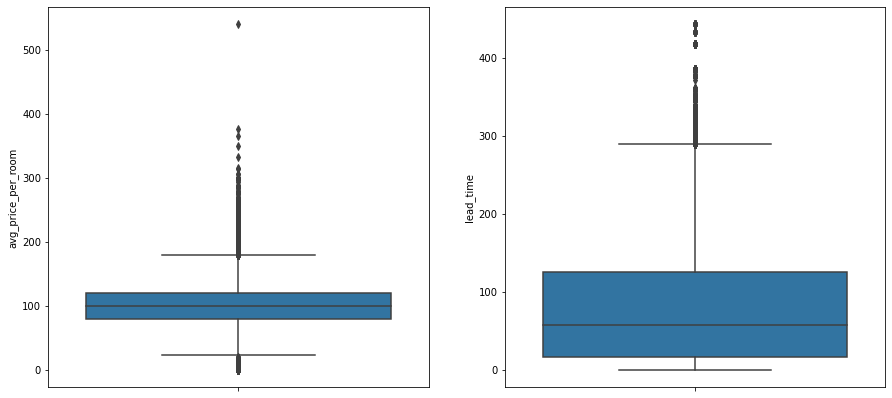

<IPython.core.display.Javascript object>

In [73]:
# Let's check the outliers there are outside 1.5 IQR (boxplot method )

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y="avg_price_per_room")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="lead_time")

plt.show()

* The average price per room have some outliers. We are not going to treat these outliers, since they represent real values.  As we saw we have some complimentary and promotional bookings (not charge for the room). And we know that the price per room can reach 400€. The only outliers that we are going to treat are the ones that are over 400€, since they are too far apart from the other outliers.

* The lead_time have some outliers. Since generally it's possible to book a hotel room three years in advance, we are not goint to treat these outliers.

## Outlier treatment

In [74]:
# Let's treat the outliers of avg_price_per_room that have a value greater than 400€.

# Checking how many values are greater than 400€.
print(
    f'The number of bookings whith average price per room greater than 400 are {(df["avg_price_per_room"] > 400).sum()}'
)

# Making this value equal to 400€.
df["avg_price_per_room"][df["avg_price_per_room"] > 400] = 400

The number of bookings whith average price per room greater than 400 are 1


<IPython.core.display.Javascript object>

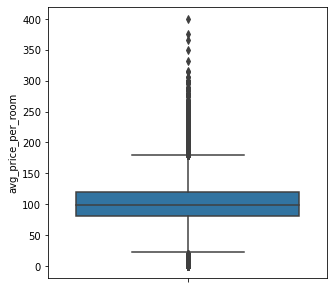

<IPython.core.display.Javascript object>

In [75]:
# Checking the boxplot after the outlier treatment
plt.figure(figsize=(5, 5))

sns.boxplot(data=df, y="avg_price_per_room")
plt.show()

* Now we don't have prices per room bigger than 400€.

## Building a Logistic Regression model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer is going to cancel the booking but in reality the customer is not going to cancel the booking.
2. Predicting a customer is not going to cancel the booking but in reality the customer is going to cancel the booking.

### Which case is more important? 
* Both the cases are important as:

* If we predict a customer is going to cancel but actually the customer don't cancel, the hotel might not be able to provide a good service to the customer. This is a loss of oportunity to the hotel to gain a loyal customer.

* If we predict a customer is not going to cancel but actually the customer cancel, the hotel will loose resources when cannot resell the room, or if it can resell for a lower price. Hotel will have additional costs paying for publicity to help sell these rooms.


### How to reduce this loss ?

*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly (minimize False Negatives and False Positives).

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [76]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [77]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Data Preparation

#### Creating training and test sets

In [78]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# Encoding the categorical features
X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
# Use stratify=Y to keep the same proportion of target variable in both train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [79]:
# checking the proportion of the target and independent variables in the train and test set
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Logistic Regression (with statsmodels library)

In [80]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3322
Time:                        17:19:46   Log-Likelihood:                -10725.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -887.3179    121.334     -7.313      0.000   -1125.129    -649.507
no_of_adults                             0.0322      

<IPython.core.display.Javascript object>

In [81]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision       F1
0   0.80679  0.632768   0.739845  0.68213

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of the customer canceling the booking decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of the customer canceling the booking increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [82]:
vif_series = pd.Series(
    [
        round(variance_inflation_factor(X_train.values, i), 2)
        for i in range(X_train.shape[1])
    ],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   39613710.76
no_of_adults                                   1.35
no_of_children                                 2.09
no_of_weekend_nights                           1.07
no_of_week_nights                              1.09
required_car_parking_space                     1.03
lead_time                                      1.40
arrival_year                                   1.43
arrival_month                                  1.28
arrival_date                                   1.01
repeated_guest                                 1.75
no_of_previous_cancellations                   1.32
no_of_previous_bookings_not_canceled           1.57
avg_price_per_room                             2.04
no_of_special_requests                         1.25
type_of_meal_plan_Meal Plan 2                  1.26
type_of_meal_plan_Meal Plan 3                  1.01
type_of_meal_plan_Not Selected                 1.28
room_type_reserved_Room_Type 

<IPython.core.display.Javascript object>

* Some categorical levels of market_segment_type exhibit high multicollinearity, but they can be ingored since this is a categorical variable.

### Checking the p-value

* If a variable had a p-value greater than 0.05 it's considered not significant, and we are going to remove it.
* In the summary we can see that we have some features and some categorical levels of the dummy variables that have high p-values, we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


In [83]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

* The above columns are the significant column.

In [84]:
# Let's create a new train set with the selected features
X_train2 = X_train[selected_features]

<IPython.core.display.Javascript object>

In [85]:
# Let's run  a new logistic regression model
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3312
Time:                        17:19:47   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.7765    120.909     -7.194      0.000   -1106.755    -632.798
no_of_weekend_nights               0.1498      0.020      7.568      0.

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg2* as final model.**

### Coefficient interpretations

* Coefficient of no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancelations, avg_price_per_room, type_of_meal_plan_Meal Plan 2, type_of_meal_plan_Not Selected are positive. An increase in these coefficients will lead to increase in chances of a customer canceling the booking.


* Coefficient of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, room_type_reserved, market_segment are negative. An increase in these coefficients will lead to a decrease in chances of a customer canceling the booking.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [86]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_weekend_nights  no_of_week_nights  \
Odds           0.0              1.161633           1.036858   
Change_odd% -100.0             16.163304           3.685845   

             required_car_parking_space  lead_time  arrival_year  \
Odds                           0.198923   1.016015      1.536814   
Change_odd%                  -80.107736   1.601465     53.681417   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds              0.952015        0.046206                      1.335337   
Change_odd%      -4.798500      -95.379405                     33.533673   

             avg_price_per_room  no_of_special_requests  \
Odds                   1.019230                0.226386   
Change_odd%            1.923046              -77.361445   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                              1.181477                        1.233533   
Change_odd%                      18.147652                       23.353315   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                               0.688379                        0.764972   
Change_odd%                      -31.162101                      -23.502825   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                               0.502555                        0.476089   
Change_odd%                      -49.744457                      -52.391144   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                               0.268379                       0.418531   
Change_odd%                      -73.162085                     -58.146866   

             market_segment_type_Offline  
Odds                            0.169921  
Change_odd%                   -83.007897

<IPython.core.display.Javascript object>

### Coefficient interpretations

* `required_car_parking_space`: Holding all other features constant a 1 unit change in required_car_parking_space (if the customer required a parking space) will decrease the odds of a customer canceling the booking by 0.19 times or a 80% decrease in odds of a customer canceling the booking.


* `arrival_month`: Holding all other features constant a 1 unit change in arrival_month will decrease the odds of a customer canceling the booking by 0.95 times or a 4.7% decrease in odds of a customer canceling the booking.


* `repeated_guest`: Holding all other features constant a 1 unit change in repeated_guest (if a customer is a repeated guest) will decrease the odds of a customer canceling the booking by 0.04 times or a 95% decrease in odds of a customer canceling the booking.


* `no_of_special_requests`: Holding all other features constant a 1 unit change in no_of_special_requests will decrease the odds of a customer canceling the booking by 0.22 times or a 77% decrease in odds of a customer canceling the booking.


* `room_type_reserved`: The odds of a customer who reserved Room_Type_2 canceling a booking is 0.68 times less than the customer who reserved Room_Type_1 or Room_Type_3 or 31% less odds of canceling the booking. Similarly, the odds of a customer who reserved Room_Type_5 canceling a booking is 0.5 times less than the customer who reserved Room_Type_1 or Room_Type_3 or 49% less odds of canceling the booking. [keeping Room_Type 1 and Room_Type_3 category as a reference].


* `market_segment_type`: The odds of a customer whose segment is Corporate canceling a booking is 0.41 times less than the customer whose segment is Aviation, Complimentary or Online or 58% less odds of canceling the booking. Similarly, the odds of a customer whose segment is Offline canceling a booking is 0.16 times less than the customer whose segment is Aviation, Complimentary or Online or 83% less odds of canceling the booking. [keeping market_segment_type_Aviation, market_segment_type_Complimentary, market_segment_type_Online category as a reference].


* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in no_of_weekend_nights will increase the odds of a customer canceling the booking by 1.11 times or a 16% increase in odds of a customer canceling the booking.


* `no_of_week_nights`: Holding all other features constant a 1 unit change in no_of_week_nights will increase the odds of a customer canceling the booking by 1.03 times or a 3.6% increase in odds of a customer canceling the booking.


* `arrival_year`: Holding all other features constant a 1 unit change in arrival_year will increase the odds of a customer canceling the booking by 1.53 times or a 53% increase in odds of a customer canceling the booking.


* `no_of_previous_cancellations`: Holding all other features constant a 1 unit change in no_of_previous_cancellations will increase the odds of a customer canceling the booking by 1.33 times or a 33% increase in odds of a customer canceling the booking.


* `lead_time`: Holding all other features constant a 1 unit change (one day) in lead_time will increase the odds of a customer canceling the booking by 1.01 times or a 1.6% increase in odds of a customer canceling the booking.


* `avg_price_per_room`: Holding all other features constant a 1 unit change (one euro) in avg_price_per_room will increase the odds of a customer canceling the booking by 1.01 times or a 1.9% increase in odds of a customer canceling the booking.


* `type_of_meal_plan`: The odds of a customer who chooses the Meal Plan 2 canceling a booking is 1.18 times more than the customer who chooses the Meal Plan 1 or 3, or 18% more odds of canceling the booking. Similarly, the odds of a customer who not select a meal plan canceling a booking is 1.23 times more than the customer who chooses the Meal Plan 1 or 3, or 23% more odds of canceling the booking. [keeping type_of_meal_plan Meal Plan 1 and type_of_meal_plan Meal Plan 3 category as a reference].

#### Checking model performance on the training set

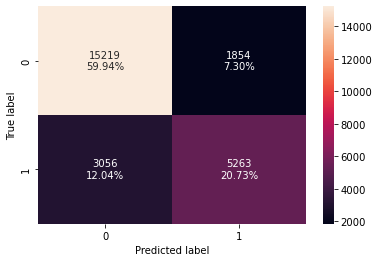

<IPython.core.display.Javascript object>

In [87]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [88]:
# checking model performance
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.806632  0.632648   0.739497  0.681912

<IPython.core.display.Javascript object>

#### ROC-AUC 
* ROC-AUC on training set

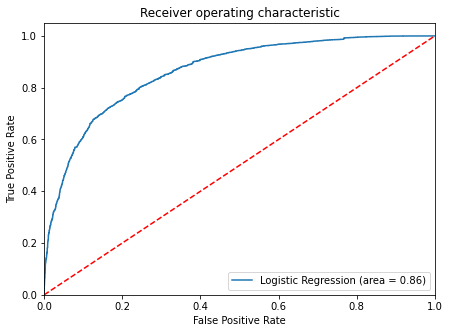

<IPython.core.display.Javascript object>

In [89]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

* Let's see if the F1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [90]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(
    tpr - fpr
)  # argmax gives the location (line number) where you have this maximum tpr-fpr

optimal_threshold_auc_roc = thresholds[optimal_idx]
print("The optimal threshold as per AUC-ROC curve is", optimal_threshold_auc_roc)

The optimal threshold as per AUC-ROC curve is 0.3329588439155949


<IPython.core.display.Javascript object>

#### Checking model performance on training set with optimal threshold per AUC_ROC curve

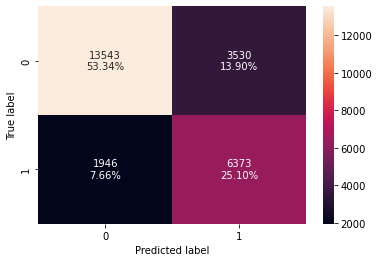

<IPython.core.display.Javascript object>

In [91]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [92]:
# checking model performance for model with optimal threshold
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.784342  0.766078   0.643542  0.699484

<IPython.core.display.Javascript object>

* F1 score and Recall of model have increased but Precison and Accuracy have reduced.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

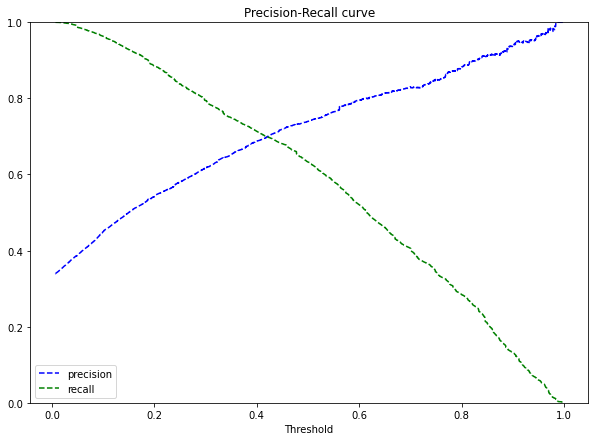

<IPython.core.display.Javascript object>

In [93]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.title("Precision-Recall curve")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

### Optimal threshold using Precision-Recall curve

In [94]:
# Optimal threshold as per Precision Recall curve
# The optimal threshold will be where precision - recall = 0
Prec_Rec_df = pd.DataFrame({"Prec-Rec": prec - rec})
optimal_index = Prec_Rec_df[Prec_Rec_df["Prec-Rec"] == 0].index
optimal_threshold_prec_rec = tre[optimal_index[0]]
print(
    "The optimal threshold as per Precision-Recall curve is", optimal_threshold_prec_rec
)

The optimal threshold as per Precision-Recall curve is 0.41978694862713084


<IPython.core.display.Javascript object>

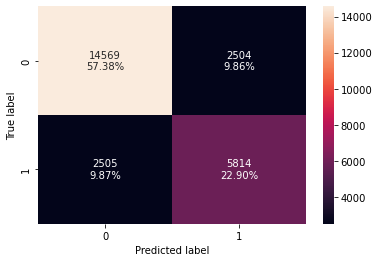

<IPython.core.display.Javascript object>

In [95]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_prec_rec
)

In [96]:
# checking model performance for model with optimal threshold
log_reg_model_train_perf_threshold_prec_rec = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_prec_rec
)
print("Training performance:")
log_reg_model_train_perf_threshold_prec_rec

Training performance:


Accuracy    Recall  Precision        F1
0  0.802733  0.698882   0.698966  0.698924

<IPython.core.display.Javascript object>

* Model is performing well on training set.

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [97]:
X_test2 = X_test[list(X_train2.columns)]

<IPython.core.display.Javascript object>

**Using model with default threshold**

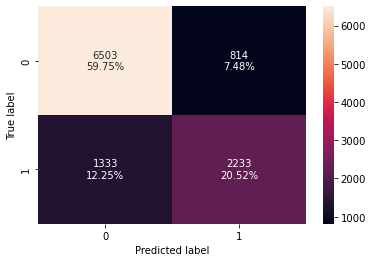

<IPython.core.display.Javascript object>

In [98]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [99]:
# checking model performance
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0   0.80272  0.626192   0.732852  0.675336

<IPython.core.display.Javascript object>

* ROC curve on test set

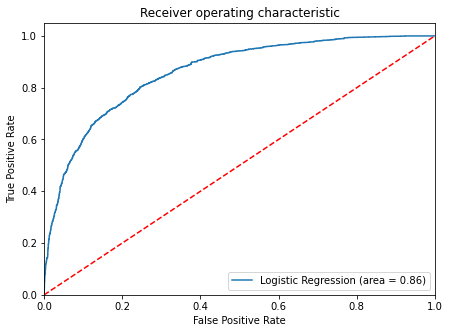

<IPython.core.display.Javascript object>

In [100]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.33** 

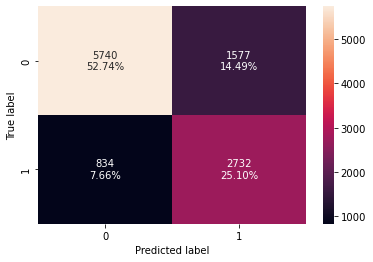

<IPython.core.display.Javascript object>

In [101]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [102]:
# checking model performance for model with optimal threshold
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.784342  0.766078   0.643542  0.699484

<IPython.core.display.Javascript object>

**Using model with threshold = 0.42**

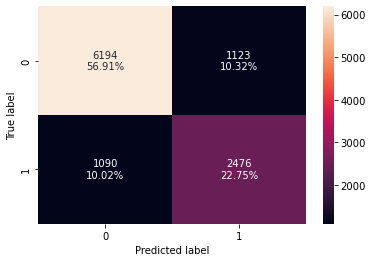

<IPython.core.display.Javascript object>

In [103]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_prec_rec)

In [104]:
# checking model performance
log_reg_model_test_perf_threshold_prec_rec = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_prec_rec
)
print("Test performance:")
log_reg_model_test_perf_threshold_prec_rec

Test performance:


Accuracy    Recall  Precision        F1
0  0.796655  0.694335   0.687969  0.691137

<IPython.core.display.Javascript object>

## Model performance evaluation

In [105]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_prec_rec.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression - default Threshold (0.5)",
    "Logistic Regression - 0.33 Threshold",
    "Logistic Regression - 0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression - default Threshold (0.5)  \
Accuracy                                        0.806632   
Recall                                          0.632648   
Precision                                       0.739497   
F1                                              0.681912   

           Logistic Regression - 0.33 Threshold  \
Accuracy                               0.784342   
Recall                                 0.766078   
Precision                              0.643542   
F1                                     0.699484   

           Logistic Regression - 0.42 Threshold  
Accuracy                               0.802733  
Recall                                 0.698882  
Precision                              0.698966  
F1                                     0.698924

<IPython.core.display.Javascript object>

* The model with this three different thersholds is performing well on the training set.

* The 0.33 and 0.42 thresholds give higher F1 scores than the 0.5 threshold.

* The model with 0.42 threshold is a good model, as it gives a high F1 score and a balanced Recall and Precision (since we want to maximize both).

In [106]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_prec_rec.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.802720   
Recall                                        0.626192   
Precision                                     0.732852   
F1                                            0.675336   

           Logistic Regression-0.33 Threshold  \
Accuracy                             0.778462   
Recall                               0.766125   
Precision                            0.634022   
F1                                   0.693841   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.796655  
Recall                               0.694335  
Precision                            0.687969  
F1                                   0.691137

<IPython.core.display.Javascript object>

* Accuracy, Recall, Precision and F1 score on test set are very similar to the training set, for each threshold. Thus, the model is perfoming well on the test set and have the ablity to perform well on new data samples.

## Final Model Summary

In [107]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3312
Time:                        17:19:50   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.7765    120.909     -7.194      0.000   -1106.755    -632.798
no_of_weekend_nights               0.1498      0.020      7.568      0.

<IPython.core.display.Javascript object>

* Our final model is:
$$y = \frac{1}{1+e^{-(a+bx1+cx2 ...m_{i}x_{i})}}$$


* The model with the coefficients is:

**y = 1/ 1 + e^- ( - 869 + 0.14 no_of_weekend_nights + 0.03 no_of_week_nights <br> - 1.61 required_car_parking_space + 0.01 lead_time + 0.42 arrival_year <br> - 0.04 arrival_month - 3.07 repeated_guest + 0.28 no_of_previous_cancellations <br> + 0.01 avg_price_per_room -1.48 no_of_special_requests <br> + 0.16 type_of_meal_plan_Meal Plan 2 + 0.2 type_of_meal_plan_Not Selected <br> - 0.37 room_type_reserved_Room_Type2 - 0.26 room_type_reserved_Room_Type4 <br> - 0,68 room_type_reserved_Room_Type5 - 0.74 room_type_reserved_Room_Type6 <br> - 1.31 room_type_reserved_Room_Type7 - 0.87 market_segment_type_Corporate<br> - 1.77 market_segment_type_Offline)**

## Building a Decision Tree model

**Remembering that our model evaluation criterion is:** 

*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly (minimize False Negatives and False Positives).

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix_sklearn function will be used to plot confusion matrix.

In [108]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [109]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Data Preparation

#### Creating training and test sets

In [110]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# Encoding the categorical features
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
# Use stratify=Y to keep the same proportion of target variable in both train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [111]:
# checking the proportion of the target and independent variables in the train and test set
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Build a Decision Tree Model 

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 

In [112]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)

<IPython.core.display.Javascript object>

In [113]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

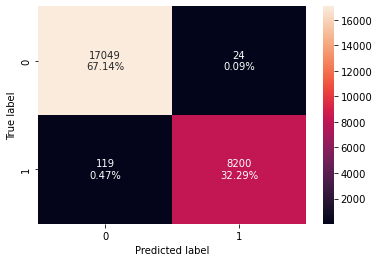

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(model, X_train, y_train)

In [115]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.994368  0.985695   0.997082  0.991356

<IPython.core.display.Javascript object>

* Model is able to classify almost perfectly all the data points on the training set.
* 0.47% errors predicting customers who cancel and 0.09% errors predicting customers who do not cancel.

#### Checking model performance on test set

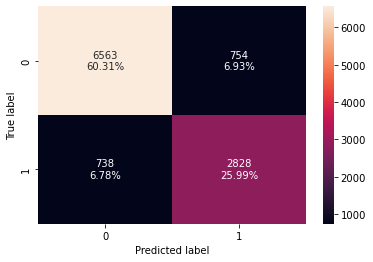

<IPython.core.display.Javascript object>

In [116]:
confusion_matrix_sklearn(model, X_test, y_test)

In [117]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision       F1
0  0.862905  0.793045   0.789503  0.79127

<IPython.core.display.Javascript object>

* The model lost its performance (F1 Score and all the other metrics are lower in the test set) which suggests that the model is overfitting.

### Visualizing the Decision Tree

In [118]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

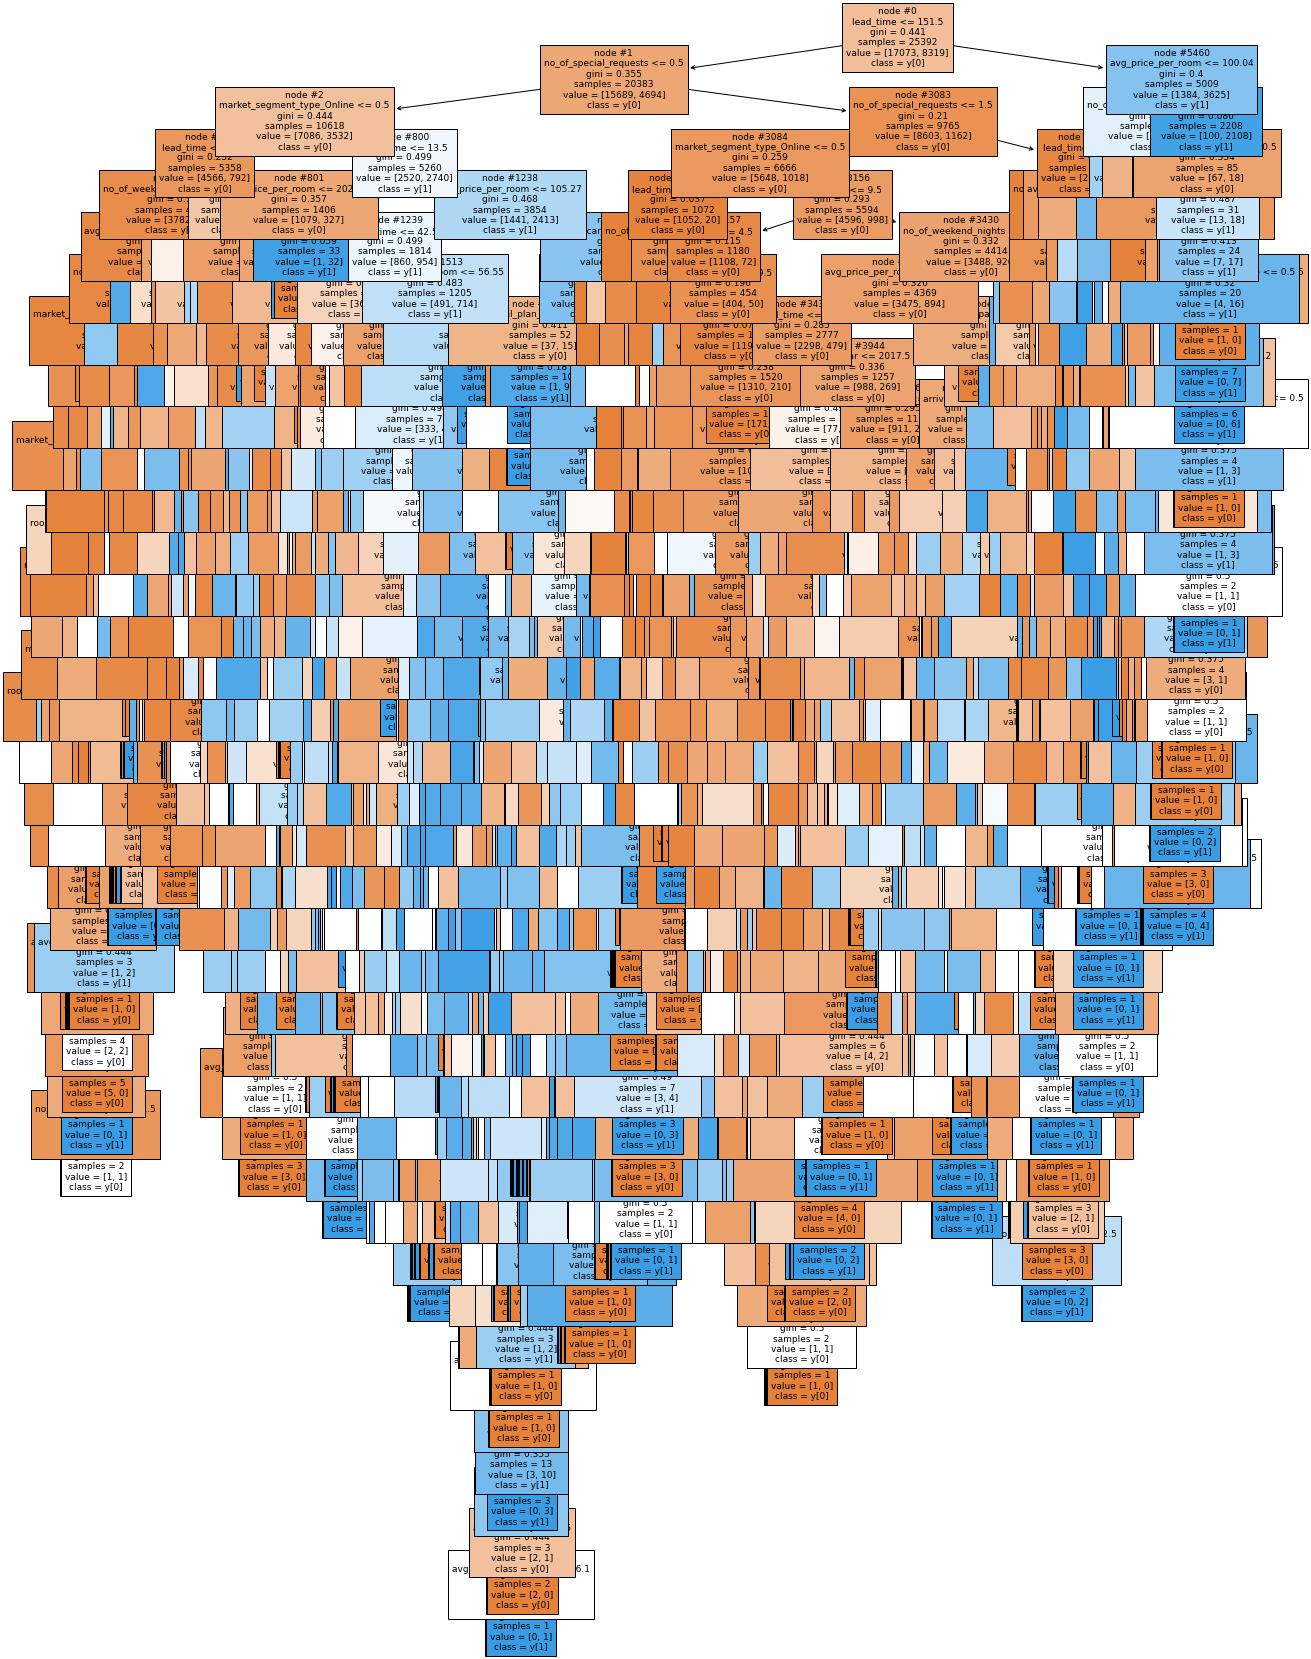

<IPython.core.display.Javascript object>

In [119]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [120]:
# Text report showing the rules of a decision tree

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 88.60
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [73.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [150.00, 0.00] class: 0
|   |   |   |   |   |   

<IPython.core.display.Javascript object>

* The tree above is very complex and difficult to interpret.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the tree will learn all the patterns in the training set.

In [121]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.353324
avg_price_per_room                    0.169653
market_segment_type_Online            0.087506
arrival_date                          0.082301
no_of_special_requests                0.071164
arrival_month                         0.069712
no_of_week_nights                     0.043240
no_of_adults                          0.035249
no_of_weekend_nights                  0.032500
arrival_year                          0.015771
room_type_reserved_Room_Type 4        0.007757
required_car_parking_space            0.006771
type_of_meal_plan_Not Selected        0.006179
type_of_meal_plan_Meal Plan 2         0.005977
no_of_children                        0.004648
market_segment_type_Corporate         0.001981
market_segment_type_Offline           0.001840
room_type_reserved_Room_Type 5        0.001261
room_type_reserved_Room_Type 2        0.001064
room_type_reserved_Room_Type 6        0.000928
repeated_gues

<IPython.core.display.Javascript object>

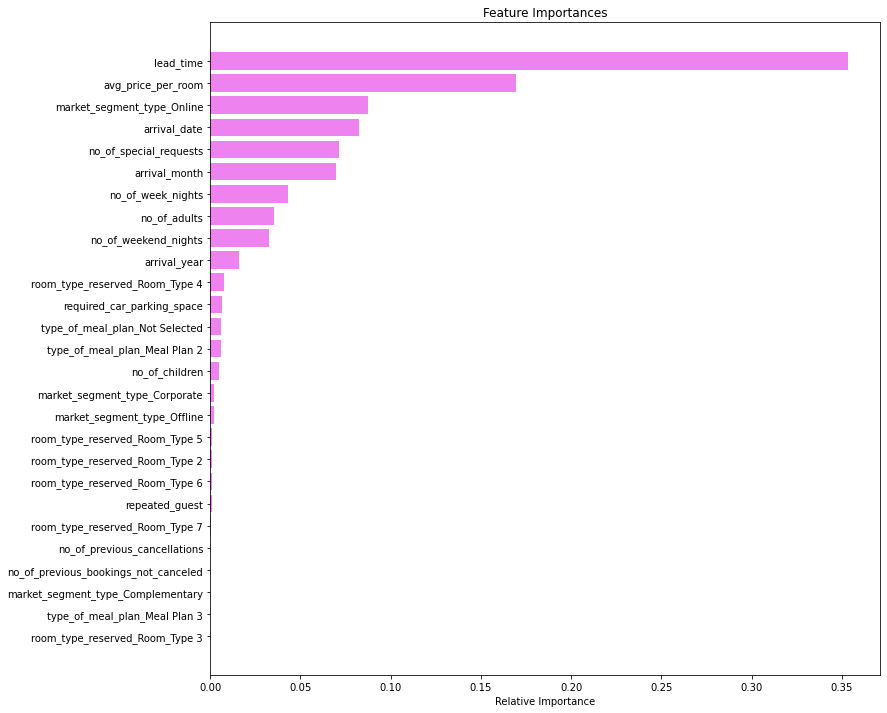

<IPython.core.display.Javascript object>

In [122]:
# visualizing the features more important in the decision tree
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

*  lead_time, avg_price_per_room and market_segment_type_Online are the top 3 important features for predicting the booking status.

### Pre-Pruning the tree

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation, i.e we'll use Grid search.
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [123]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": [2, 4, 6],
    "min_samples_leaf": [30, 50, 70, 100],
    "max_leaf_nodes": [25, 50, 75, 100, 150, 200, 250],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_impurity_decrease=0.001, min_samples_leaf=30,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

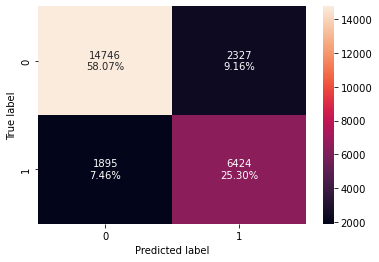

<IPython.core.display.Javascript object>

In [124]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [125]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.833727  0.772208   0.734088  0.752665

<IPython.core.display.Javascript object>

* The F1 score is lower than the initial model.

#### Checking performance on test set

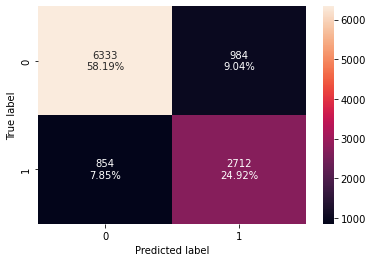

<IPython.core.display.Javascript object>

In [126]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [127]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.831113  0.760516   0.733766  0.746902

<IPython.core.display.Javascript object>

* The model is giving a generalized performance on training and test set.

###  Visualizing the Decision Tree

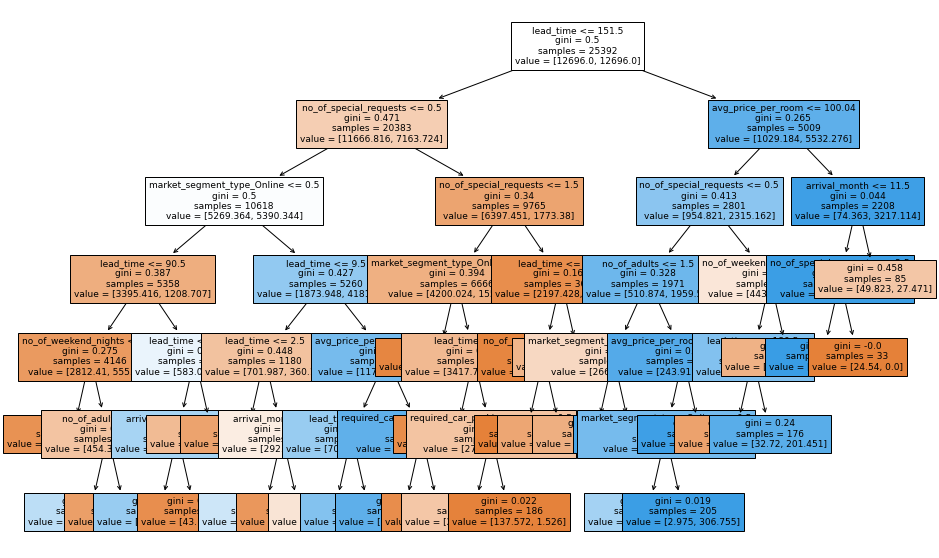

<IPython.core.display.Javascript object>

In [128]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [129]:
# Text report showing the rules of a decision tree

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- weights: [2358.05, 314.39] class: 0
|   |   |   |   |--- no_of_weekend_nights >  1.50
|   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |--- weights: [104.11, 157.19] class: 1
|   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |--- weights: [350.25, 83.94] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |--- weights: [245.40, 512.78] class: 1
|   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |--- weights: [43.13, 4.58] class: 0
|   |   |   |   |--- lead_time >  117.50
|   |   |   |   |   |--- weights: [294.48, 135.83] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_ti

<IPython.core.display.Javascript object>

**Observations from the tree:**

We get a simplified tree after pre-pruning.

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer books a room less than 90 days before his arrival date, and he doesn't have any special request, he doesn't book online and he books one weekend night or doesn't book a weekend night, this customer is not going to cancel his reservation. But if this customer books two or more weekend nights he is going to cancel if he is alone, and not going to cancel if he is with one or more than one other adult. 


* If a customer books a room between 90 and 117 days of his arrival date, he doesn't have any special request and he doesn't book online he is going to cancel if his arrival month is october or before october. He is not going to cancel if his arrival month is after october.


* If a customer books a room less than two days before his arrival date, he doesn't have any special request and he books online, he is not going to cancel his reservation.


* If a customer books a room more than 152 days before his arrival date, the average price per room is less than 100€, he doesn't have any special request, he is the only guest in the reservation,  he is not going to cancel if he doesn't book online but he is going to cancel his reservation if he books online.

In [130]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.482872
market_segment_type_Online            0.191449
no_of_special_requests                0.175262
avg_price_per_room                    0.056339
no_of_adults                          0.035473
no_of_weekend_nights                  0.021716
arrival_month                         0.021073
required_car_parking_space            0.011575
no_of_week_nights                     0.004241
repeated_guest                        0.000000
no_of_previous_cancellations          0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_

<IPython.core.display.Javascript object>

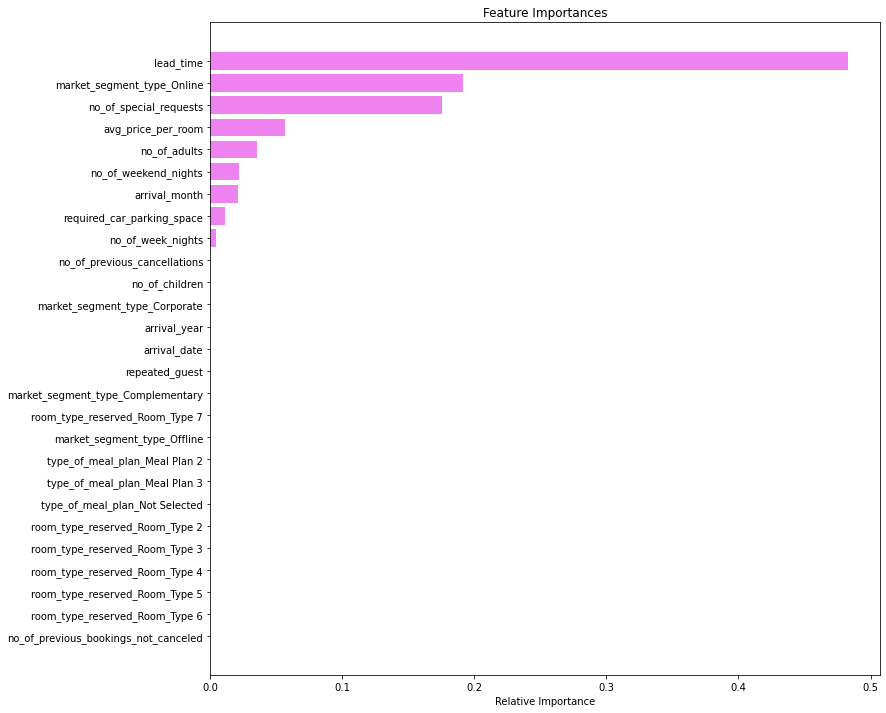

<IPython.core.display.Javascript object>

In [131]:
# visualizing the features more important in the decision tree
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre-pruned decision tree lead_time is the most important feature, followed by market_segment_type_Online and no_of_special_requests for prediction of the booking status.

### Post-Pruning the tree

Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. 



### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.



In [132]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [133]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008331
1    -8.131516e-20    0.008331
2     0.000000e+00    0.008331
3     2.926260e-20    0.008331
4     2.926260e-20    0.008331
...            ...         ...
1666  9.377225e-03    0.327908
1667  9.408290e-03    0.337317
1668  1.253153e-02    0.349848
1669  3.404623e-02    0.417941
1670  8.205938e-02    0.500000

[1671 rows x 2 columns]

<IPython.core.display.Javascript object>

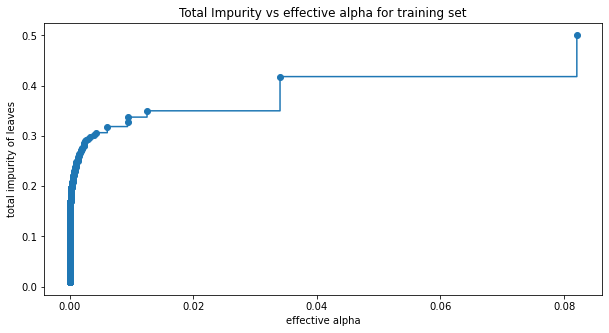

<IPython.core.display.Javascript object>

In [134]:
# plot alpha vs impurity
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:], impurities[:], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* As we remove subtrees (prune the tree), alpha increases and impurity increases. The higher alpha, the last one, is the one when we have a tree wiht only one node. The first alpha, the lower one, is the one when we have the more complex tree.

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [135]:
# creating a decision tree model for each alpha

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08205938055988288


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

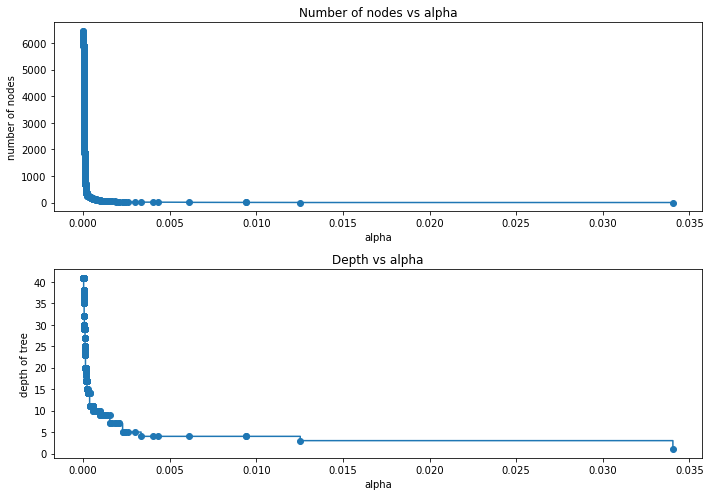

<IPython.core.display.Javascript object>

In [136]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# visualizing the number of nodes and the depth of the tree versus alpha

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* As we prune the tree, the number of nodes and the depth of the tree decreases.

### F1 Score vs alpha for training and testing sets

In [137]:
# obtaining F1 score for each model clf, for train and test set
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

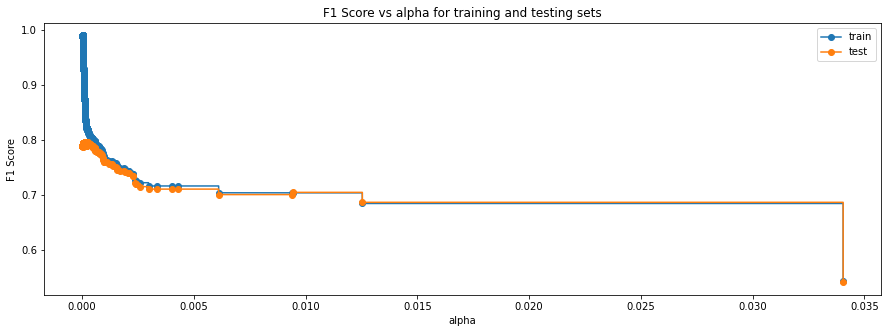

<IPython.core.display.Javascript object>

In [138]:
# visualizing F1 score versus alpha for train and test set
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

* In the tets set, the best model is in the highest values of F1 Score test. 

In [139]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00010709530427669892,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

* The best model has an alpha of 0.000107.

#### checking performance on training set

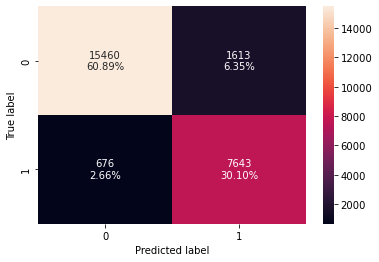

<IPython.core.display.Javascript object>

In [140]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [141]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy   Recall  Precision        F1
0  0.909853  0.91874   0.825735  0.869758

<IPython.core.display.Javascript object>

* The F1 Score is higher than the pre-pruned model.

#### checking performance on test set

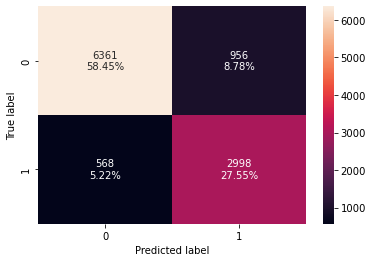

<IPython.core.display.Javascript object>

In [142]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [143]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

Accuracy    Recall  Precision       F1
0  0.859965  0.840718    0.75822  0.79734

<IPython.core.display.Javascript object>

* With post-pruning we get a model that loose some of its performance in the test set, as the F1 Score is lower in the test set compared with the train set. This suggests some overfitting of the model.

### Visualizing the Decision Tree

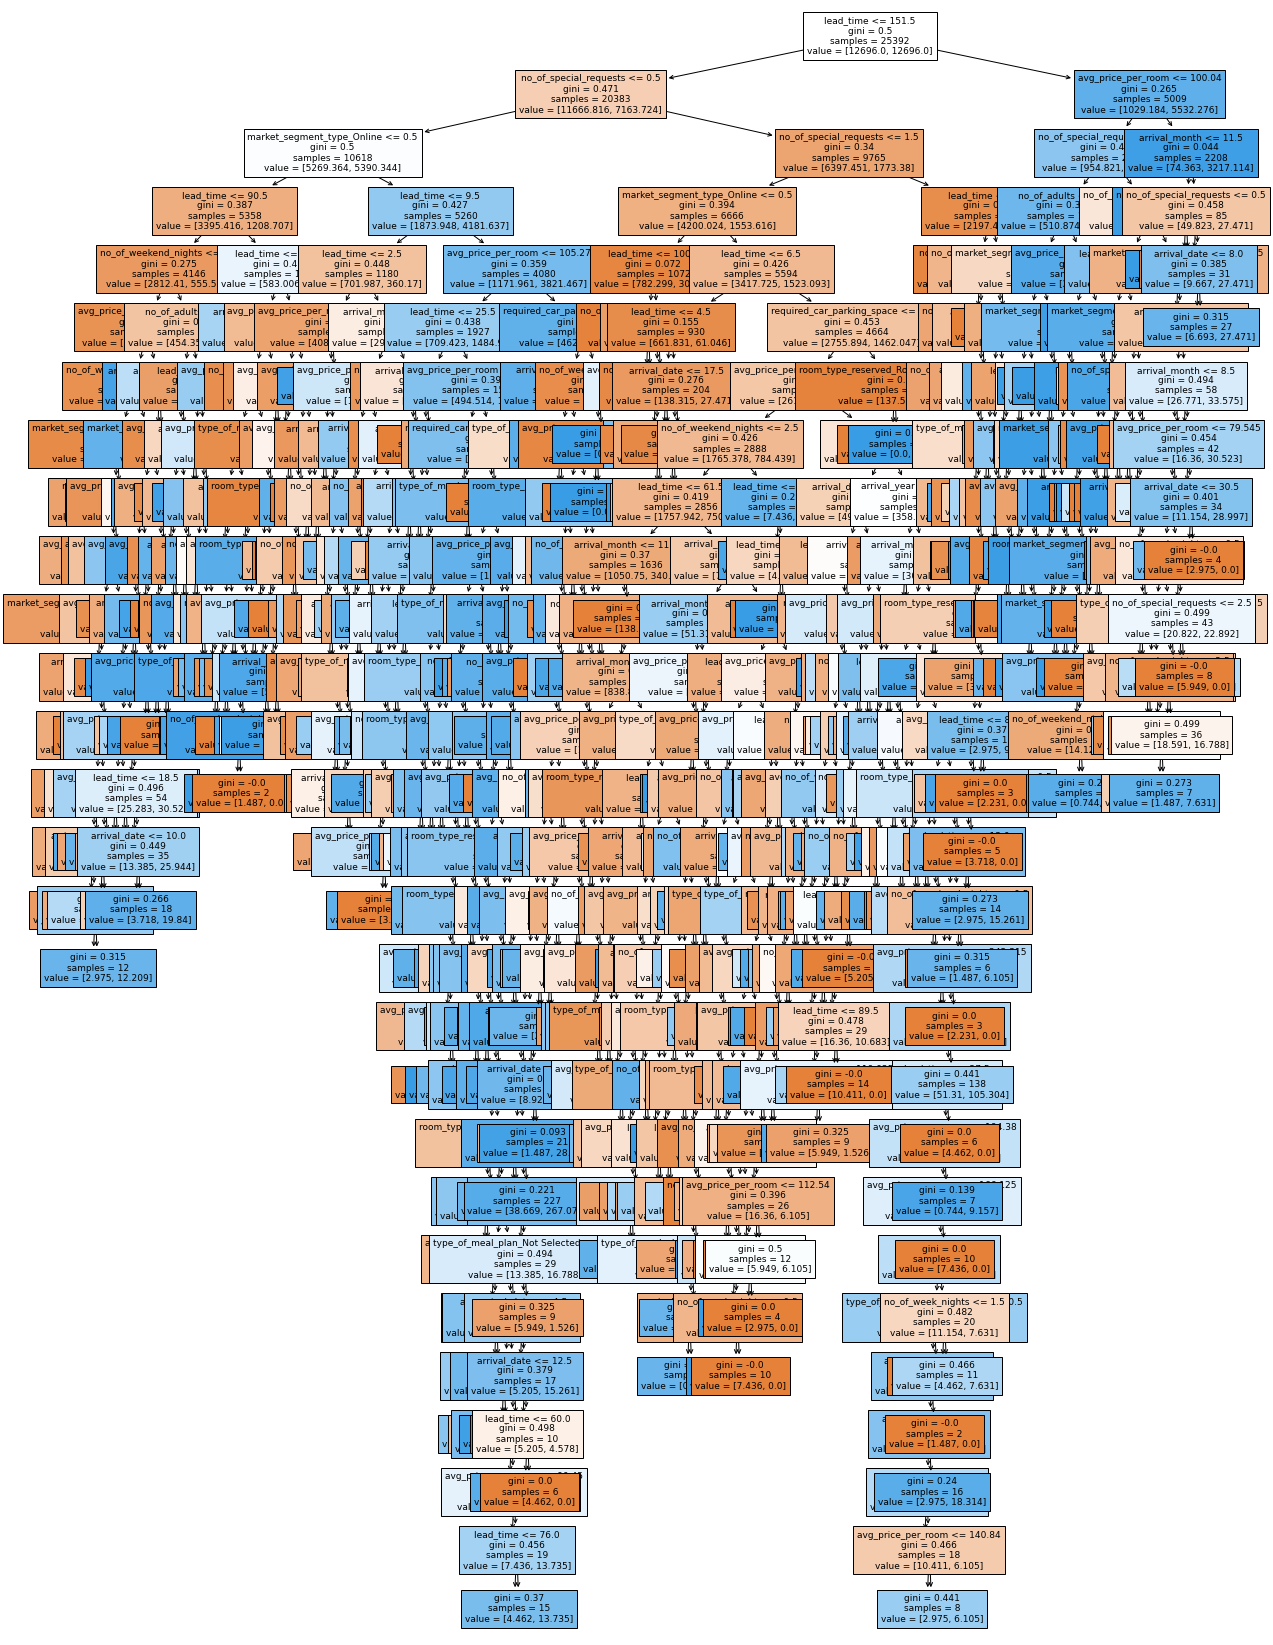

<IPython.core.display.Javascript object>

In [144]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* The post-pruned tree is complex and difficult to interpret.

In [145]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 87.25
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [54.29, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  87.25
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |  

<IPython.core.display.Javascript object>

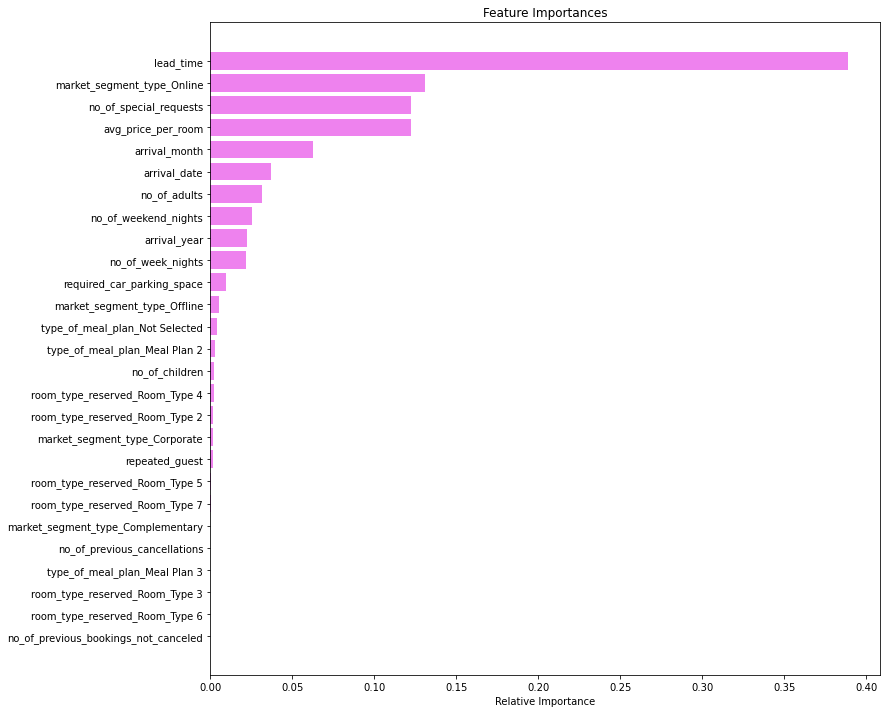

<IPython.core.display.Javascript object>

In [146]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* lead_time, market_segment_type_Online, and no_of_special_requests are the top three important features to predict customer booking status.

### Comparing Decision Tree models

In [147]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.994368                     0.833727   
Recall                  0.985695                     0.772208   
Precision               0.997082                     0.734088   
F1                      0.991356                     0.752665   

           Decision Tree (Post-Pruning)  
Accuracy                       0.909853  
Recall                         0.918740  
Precision                      0.825735  
F1                             0.869758

<IPython.core.display.Javascript object>

In [148]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.862905                     0.831113   
Recall                  0.793045                     0.760516   
Precision               0.789503                     0.733766   
F1                      0.791270                     0.746902   

           Decision Tree (Post-Pruning)  
Accuracy                       0.859965  
Recall                         0.840718  
Precision                      0.758220  
F1                             0.797340

<IPython.core.display.Javascript object>

* The Decision Tree sklearn has given the highest F1 score in the train set, but this model is overfitting and complex to interpret.


* The Decision Tree (Post-Pruning) has a high F1 Score, but the model has some overfitting and is complex to interpret.


* The Decision Tree (Pre-Pruning) has a lower F1 Score when compared to the other models, but this model has given a generalized performance on training and test set. Besides, this model is less complex and easy to interpret, which makes this our best decision tree model. 

## Do we need to prune the tree?

* As we saw, the first tree without pruning is a complex tree and the model is overfitting. In our case a pre-pruned model was a simpliest easier to interpret model, with a generalized performance. So yes, we needed to prune the tree to find the best model.

## Model Performance Comparison and Conclusions

**Logistic regression model:**
* We built a logistic regression model with 19 features. This model gives probabilities of booking cancelation.
* The logistic regression model has given a good performance on train and test set, and with threshold of 0.42 has given a  F1 Score of 0.69.
* From the model we know that an increase  in lead time, average price per room, number of week or weekend nights will lead to an increase in chances of a customer canceling the booking.
*  Similarly, an increase in the number of special requests, month of arrival or if require a car parking space will lead to a decrease in chances of a customer canceling the booking. 
* The interpretation of the coefficients is not direct, as the model is in terms of log(odd). Coefficient interpretation of lead time is:
    * `lead_time`: Holding all other features constant a 1 unit change (one day) in lead_time will increase the odds of a customer canceling the booking by 1.01 times or a 1.6% increase in odds of a customer canceling the booking.
* As we can see the interpretation of the coefficients is difficult.


<b> Decision tree model:<b>
* We built a pre-pruned decision tree model with 9 features. This model gives us a prediction for the booking status.
* The model has given a generalized and good performance on training and test set, with a F1 Score of 0.74.
* The most important feature is the lead time, followed by Online market segment and number of special requests for predictingif a customer is goint to cancel his booking.
* This model is easy to understand and interpret. We can make interpretations from the decision tree model like:
    * If a customer books a room less than two days before his arrival date, he doesn't have any special request and he books online, he is not going to cancel his reservation.

The hotel can choose between these two models as both have a good performance and good F1 Score. The logistic regression gives probabilities of booking cancelation and decision tree gives a prediction for the booking status. The hotel can choose which one it prefers.


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* Some factors that have a high influence in booking cancellations are the lead time, if it was booked Online, Offline or Corporate, the number of special requests, the average price per room, number of adults, number of weekend or week nights, required car parking space and arrival month.
* Considering that this hotel have in place already a policy for free cancellations up to 48 hours before arrival, with a cancelation fee equivalent of one night stay, the hotel can implement the following policies:
    * If booking is made 4 months before arrival date, free cancellation up to 5 days before arrival.
    * If booking is made more than 4 months before arrival date, free cancellation up to 10 days before arrival.
    * If booking online, free cancellation up to 3 days before arrival.
    * If booking more than 5 days of stay, cancellation fee equivalent of two nights of stay.
    * If booking on Summer months, cancellation fee equivalent of two nights of stay.
    * If booking for one adult only, free cancelation up to 24 hours (less likely to cancel).
    * Offer a rate option that includes free cancelation up to 24 for hours before arrival.
    
* Some other recomendations:
    * Have an ample parking lot to attend the customer who requires a parking space (this is the customer with an 80% less odds of canceling the booking).
    * Increase the offer of special requests, like birthday cake in the room, limousine service, work out clothing, musical instruments, bike, upgrade for a special occasion). The guest that has one special request has 77% less odds of canceling the booking.
    * Offer loyalty program and discount for returning guests, since this guest has 95% less odds of canceling the booking.
    * Promote conventions and professional meetings to grow the Corporate segment booking. Increase the agreements with special conditions (price, cancelation) with the Corporate segment. This segment is less likely to cancel the booking.
    * Since the more expensive the room, more likely it's going to be canceled, and the Online segment has the bigger average price per room, reduce the price of the room for the online sector to try to reduce the cancelation in this segment.
    * Offers promotions for staying one weekend or one week night + one weekend night. This guests are less likely to cancel.
    * Offers promotions on Winter months, since this are the less busiest months and less likely to be canceled bookings.
    